In [7]:
from futile import YamlIO as Y
from futile.Utils import ensure_dir, write
from BigDFT import Calculators as C
from BigDFT import Logfiles as lf
from BigDFT import Inputfiles as I,InputActions as A

import constants as const
import plotting_wrappers
import excited_states
import utilities as utils

import shutil
import os
import numpy as np
import pandas as pd
from IPython.display import display

In [8]:
import itertools
from itertools import islice
marker = itertools.cycle(('<', '+', 'x', 'o', 's')) 
marker_reset = islice(marker, 0, None)

In [9]:
geopt_xyz_dirs = ['BigDFT_geopt_files/','MMFF94_geopt_files/']

In [10]:
code = C.SystemCalculator(omp=2, mpi_run='mpirun -n 12', verbose=True)

ValueError: <class BigDFT.Calculators.Runner at 0x7f36504b8ce8> is not in list

In [5]:
hgrid = 0.45
crm = 5.0
frm = 8.0
xc = 'PBE'

# number of virtual states to optimize for S0 calculation
nvirt = 5
norbs = 10

main_dir = os.getcwd()

In [6]:
inp = {}
inp['dft'] = {} 
inp['dft'].update({'rmult': [crm, frm]})
inp['dft'].update({'ixc': xc})
inp['dft'].update({'gnrm_cv': 1.0e-4, 'itermax': 500})
# inp['dft'].update({'nvirt': nvirt, 'norbv': norbs})

inp.update({'mix': {'norbsempty': nvirt}})
inp

{'dft': {'gnrm_cv': 0.0001, 'itermax': 500, 'ixc': 'PBE', 'rmult': [5.0, 8.0]},
 'mix': {'norbsempty': 5}}

In [7]:
finished = []
# for file in os.listdir('.'):
#     if 'log-' in file:
#         finished.append(file.replace('log-','').replace('.yaml',''))
finished

[]

In [8]:
geopt_xyz_dirs = ['BigDFT_geopt_files',  'MMFF94_geopt_files']

data = {}

data['molecule'] = []
data['Geometry optisimed Method'] = []
data['HOMO (eV)'] = []
data['LUMO (ev)'] = []
data['Energy (eV)'] = []
data['Force Norm (Hartree/Bohr)'] = []
data['CPU times (s)'] = []


for dir in geopt_xyz_dirs:
    for file in os.listdir(dir):
    
        if '.xyz' in file:

            if 'BigDFT' in dir:
                method = 'BigDFT'
                run_name = file.replace('_s0xyz_cubic.xyz','_BigDFT_s0xyz_s0_cubic').replace('final_','')
            else:
                method = 'MMFF94'
                run_name = file.replace('.xyz','').replace('_MMFF94_geopt','_PBE_MMFF94_s0xyz_s0_cubic')

            if run_name not in finished:
                
                mol = run_name.split('_PBE_')[0]


                key = mol+'_'+method

                run = code.run(input=inp, posinp=file, name=run_name, skip=True)
                
                
                data['molecule'].append(mol)
                data['Geometry optisimed Method'].append(method)

                #converged = True
                # check logfile to see if it actually reached convergence
                final_gnrm = run.log['Ground State Optimization'][-1]['Hamiltonian Optimization'][-1]\
                                ['Subspace Optimization']['Wavefunctions Iterations'][-1]['gnrm']

                if final_gnrm > float(inp['dft']['gnrm_cv']):
                    #converged = False
                    print 'WARNING, calculation did not converge'
                    data['HOMO (eV)'].append(float('nan'))
                    data['LUMO (ev)'].append(float('nan'))
                    data['Energy (eV)'].append(float('nan'))
                    data['Force Norm (Hartree/Bohr)'].append(float('nan'))
                    data['CPU times (s)'].append(float('nan'))


                else:
    #                 print(run.number_of_orbitals, nvirt)
    #                 ihs[mol] = run.number_of_orbitals - nvirt
                    ihs = run.number_of_orbitals - nvirt



                    homo = const.Ha2eV * run.evals[0][0][ihs - 1]
                    lumo = const.Ha2eV * run.evals[0][0][ihs]

                    energy = const.Ha2eV * run.energy / run.nat
                    time = run.log['Timings for root process']['Elapsed time (s)'] / 60.0  
                    force = run.log['Force Norm (Hartree/Bohr)']

                    data['HOMO (eV)'].append(homo)
                    data['LUMO (ev)'].append(lumo)
                    data['Energy (eV)'].append(energy)
                    data['Force Norm (Hartree/Bohr)'].append(force)
                    data['CPU times (s)'].append(time)

                    print 'calc of '+mol+' with '+method+' geometry took '+\
                          '{0:.1f}'.format(time)+\
                          ' minutes, E = '+'{0:.2f}'.format(energy)+' eV/atom, HOMO = '+\
                          '{0:.2f}'.format(homo)+' eV, LUMO = '+\
                          '{0:.2f}'.format(lumo)+ ' eV'

                print ''             

Creating the yaml input file "./TXO-PhCz_-49.87664014169004_PBE_BigDFT_s0xyz_s0_cubic.yaml"
Executing command:  mpirun -n 12 /workspace/kt4218/bigdft-suite-MartinaS/Build/install/bin/bigdft -n TXO-PhCz_-49.87664014169004_PBE_BigDFT_s0xyz_s0_cubic -s Yes
calc of TXO-PhCz_-49.87664014169004 with BigDFT geometry took 1.2 minutes, E = -166.62 eV/atom, HOMO = -5.99 eV, LUMO = -4.51 eV

Creating the yaml input file "./YAFNOI_-6.451554836773575_PBE_BigDFT_s0xyz_s0_cubic.yaml"
Executing command:  mpirun -n 12 /workspace/kt4218/bigdft-suite-MartinaS/Build/install/bin/bigdft -n YAFNOI_-6.451554836773575_PBE_BigDFT_s0xyz_s0_cubic -s Yes
calc of YAFNOI_-6.451554836773575 with BigDFT geometry took 1.5 minutes, E = -121.61 eV/atom, HOMO = -4.25 eV, LUMO = -2.21 eV

Creating the yaml input file "./MOPKEI_PBE_BigDFT_s0xyz_s0_cubic.yaml"
Executing command:  mpirun -n 12 /workspace/kt4218/bigdft-suite-MartinaS/Build/install/bin/bigdft -n MOPKEI_PBE_BigDFT_s0xyz_s0_cubic -s Yes
calc of MOPKEI with BigDFT

In [9]:
df = pd.DataFrame(data)
df["LUMO-HOMO"] = df["LUMO (ev)"] - df["HOMO (eV)"]
df

CPU times (s)  Energy (eV)  Force Norm (Hartree/Bohr)  \
0        1.222667  -166.623182                   0.001244   
1        1.530833  -121.614853                   0.002203   
2        3.223667  -238.000407                   0.016762   
3        1.585167  -195.921605                   0.004530   
4        1.981667  -121.592564                   0.000896   
5        2.234000  -122.595016                   0.003098   
6        2.028667  -190.185366                   0.004359   
7        2.077833  -190.224238                   0.009767   
8        2.657500  -181.235886                   0.002522   
9        1.278667  -116.154707                   0.038287   
10       2.676000  -115.243518                   0.027068   
11       0.875000  -110.257552                   0.000575   
12       0.684333  -116.645074                   0.003638   
13       3.143667  -125.423675                   0.003320   
14       2.220667  -122.593063                   0.054446   
15       1.055000  -116.573632                   0.199613   
16       3.312000  -128.513324                   0.066081   
17       3.934000  -120.019589                   0.084007   
18       2.056500  -121.549131                   0.576289   
19       3.025833  -121.536756                   0.186780   
20       3.222167  -139.398779                   0.052497   
21       3.820000  -130.845350                   0.059228   
22       3.069667  -237.988484                   0.066985   
23       2.141667  -190.217806                   0.045640   
24       3.025667  -143.889830                   0.078844   
25       3.148000  -125.419616                   0.100479   
26       1.684000  -195.918617                   0.049269   
27       2.110667  -166.609515                   0.077307   
28       0.872500  -110.255618                   0.029393   
29       2.760500  -139.102260                   0.048463   
30       1.934167  -190.182191                   0.041024   
31       4.741667  -113.820203                   0.103245   
32       0.921333  -116.153393                   0.065578   
33       2.744333  -181.225573                   0.067476   
34       4.907333  -136.025100                   0.046940   
35       2.813667  -115.244826                   0.059654   
36       2.668833  -119.380990                   0.094962   
37       8.309833  -126.153106                   0.137066   
38       2.456000  -132.587093                   0.112404   

   Geometry optisimed Method  HOMO (eV)  LUMO (ev)  \
0                     BigDFT  -5.990571  -4.510670   
1                     BigDFT  -4.252239  -2.208201   
2                     BigDFT  -4.156928  -2.602422   
3                     BigDFT  -4.396007  -2.282695   
4                     BigDFT  -4.466616  -2.147674   
5                     BigDFT  -4.842761  -3.055650   
6                     BigDFT  -3.967124  -2.264732   
7                     BigDFT  -4.105403  -2.337207   
8                     BigDFT  -3.896496  -2.394950   
9                     BigDFT  -5.038252  -1.838882   
10                    BigDFT  -4.632581  -2.372337   
11                    BigDFT  -4.617698  -1.606134   
12                    BigDFT  -5.046555  -2.467368   
13                    BigDFT  -5.231339  -2.964533   
14                    MMFF94  -4.891293  -3.061535   
15                    MMFF94  -5.232439  -3.077675   
16                    MMFF94  -5.045823  -3.183465   
17                    MMFF94  -4.638654  -2.519024   
18                    MMFF94  -3.301145  -2.299587   
19                    MMFF94  -2.800095  -2.726797   
20                    MMFF94  -4.844501  -3.538314   
21                    MMFF94  -4.317159  -3.070328   
22                    MMFF94  -4.168184  -2.613421   
23                    MMFF94  -3.934581  -2.201492   
24                    MMFF94  -5.218214  -3.504901   
25                    MMFF94  -5.214511  -2.906044   
26                    MMFF94  -4.427312  -2.280130   
27                    MMFF94  -5.830869  -4.394260 

In [10]:
df_BigDFT = df[df["Geometry optisimed Method"] == 'BigDFT'].reset_index()
df_BigDFT

index  CPU times (s)  Energy (eV)  Force Norm (Hartree/Bohr)  \
0       0       1.222667  -166.623182                   0.001244   
1       1       1.530833  -121.614853                   0.002203   
2       2       3.223667  -238.000407                   0.016762   
3       3       1.585167  -195.921605                   0.004530   
4       4       1.981667  -121.592564                   0.000896   
5       5       2.234000  -122.595016                   0.003098   
6       6       2.028667  -190.185366                   0.004359   
7       7       2.077833  -190.224238                   0.009767   
8       8       2.657500  -181.235886                   0.002522   
9       9       1.278667  -116.154707                   0.038287   
10     10       2.676000  -115.243518                   0.027068   
11     11       0.875000  -110.257552                   0.000575   
12     12       0.684333  -116.645074                   0.003638   
13     13       3.143667  -125.423675                   0.003320   

   Geometry optisimed Method  HOMO (eV)  LUMO (ev)  \
0                     BigDFT  -5.990571  -4.510670   
1                     BigDFT  -4.252239  -2.208201   
2                     BigDFT  -4.156928  -2.602422   
3                     BigDFT  -4.396007  -2.282695   
4                     BigDFT  -4.466616  -2.147674   
5                     BigDFT  -4.842761  -3.055650   
6                     BigDFT  -3.967124  -2.264732   
7                     BigDFT  -4.105403  -2.337207   
8                     BigDFT  -3.896496  -2.394950   
9                     BigDFT  -5.038252  -1.838882   
10                    BigDFT  -4.632581  -2.372337   
11                    BigDFT  -4.617698  -1.606134   
12                    BigDFT  -5.046555  -2.467368   
13                    BigDFT  -5.231339  -2.964533   

                       molecule  LUMO-HOMO  
0   TXO-PhCz_-49.87664014169004   1.479902  
1     YAFNOI_-6.451554836773575   2.044038  
2                        MOPKEI   1.554506  
3                        SIFHIY   2.113313  
4                        YAFNOI   2.318942  
5                        RAPGEV   1.787111  
6                        GOBVUP   1.702392  
7     GOBVUP_7.3731227514938205   1.768196  
8                        TUFWAS   1.501547  
9                          PhCz   3.199370  
10                       KAGCAW   2.260244  
11                          TPA   3.011565  
12     YAFNOI_25.97501437826382   2.579187  
13                        Cz2BP   2.266806

In [11]:
df_MMFF94 = df[df["Geometry optisimed Method"] == 'MMFF94'].reset_index()
df_MMFF94

index  CPU times (s)  Energy (eV)  Force Norm (Hartree/Bohr)  \
0      14       2.220667  -122.593063                   0.054446   
1      15       1.055000  -116.573632                   0.199613   
2      16       3.312000  -128.513324                   0.066081   
3      17       3.934000  -120.019589                   0.084007   
4      18       2.056500  -121.549131                   0.576289   
5      19       3.025833  -121.536756                   0.186780   
6      20       3.222167  -139.398779                   0.052497   
7      21       3.820000  -130.845350                   0.059228   
8      22       3.069667  -237.988484                   0.066985   
9      23       2.141667  -190.217806                   0.045640   
10     24       3.025667  -143.889830                   0.078844   
11     25       3.148000  -125.419616                   0.100479   
12     26       1.684000  -195.918617                   0.049269   
13     27       2.110667  -166.609515                   0.077307   
14     28       0.872500  -110.255618                   0.029393   
15     29       2.760500  -139.102260                   0.048463   
16     30       1.934167  -190.182191                   0.041024   
17     31       4.741667  -113.820203                   0.103245   
18     32       0.921333  -116.153393                   0.065578   
19     33       2.744333  -181.225573                   0.067476   
20     34       4.907333  -136.025100                   0.046940   
21     35       2.813667  -115.244826                   0.059654   
22     36       2.668833  -119.380990                   0.094962   
23     37       8.309833  -126.153106                   0.137066   
24     38       2.456000  -132.587093                   0.112404   

   Geometry optisimed Method  HOMO (eV)  LUMO (ev)  \
0                     MMFF94  -4.891293  -3.061535   
1                     MMFF94  -5.232439  -3.077675   
2                     MMFF94  -5.045823  -3.183465   
3                     MMFF94  -4.638654  -2.519024   
4                     MMFF94  -3.301145  -2.299587   
5                     MMFF94  -2.800095  -2.726797   
6                     MMFF94  -4.844501  -3.538314   
7                     MMFF94  -4.317159  -3.070328   
8                     MMFF94  -4.168184  -2.613421   
9                     MMFF94  -3.934581  -2.201492   
10                    MMFF94  -5.218214  -3.504901   
11                    MMFF94  -5.214511  -2.906044   
12                    MMFF94  -4.427312  -2.280130   
13                    MMFF94  -5.830869  -4.394260   
14                    MMFF94  -4.648667  -1.589318   
15                    MMFF94  -4.397815  -2.933111   
16                    MMFF94  -3.955886  -2.220191   
17                    MMFF94  -4.324157  -2.418608   
18                    MMFF94  -5.021485  -1.874230   
19                    MMFF94  -3.866078  -2.294039   
20                    MMFF94  -4.515631  -2.769999   
21                    MMFF94  -4.653345  -2.373704   
22                    MMFF94  -4.998088  -2.054175   
23                    MMFF94  -4.896211  -3.037917   
24                    MMFF94  -5.562265  -3.419561   

                       molecule  LUMO-HOMO  
0                        RAPGEV   1.829758  
1      YAFNOI_25.97501437826382   2.154764  
2                      ACRNFLCN   1.862357  
3                        HAKSOC   2.119631  
4     YAFNOI_-6.451554836773575   1.001557  
5                        YAFNOI   0.073298  
6                       TXO-TPA   1.306187  
7                       PXZ-TRZ   1.246831  
8                        MOPKEI   1.554762  
9     GOBVUP_7.3731227514938205   1.733089  
10                     TXO-PhCz   1.713312  
11                        Cz2BP   2.308468  
12                       SIFHIY   2.147182  
13  TXO-PhCz_-49.87664014169004   1.436609  
14                          TPA   3.059349  
15                      PXZ-OXD   1.464704  
16                       GOBVUP   1.735695  
17                  

In [12]:
import matplotlib.pyplot as plt
import matplotlib

In [13]:
# Parameters
ntraj=len(df_BigDFT['molecule'])
colors = plt.cm.jet(np.linspace(0,1,ntraj))# Initialize holder for trajectories

In [14]:
plt.figure(figsize=(4,4),dpi=1)

matplotlib.rcParams.update({'font.size': 12})

y_BigDFT = []
x_MMFF94 = []

for i, mol in enumerate(df_BigDFT["molecule"]):
    for j, mol2 in enumerate(df_MMFF94["molecule"]):
        if mol == mol2:
#             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
            y_BigDFT.append(df_BigDFT["LUMO-HOMO"][i])
            x_MMFF94.append(df_MMFF94["LUMO-HOMO"][j])
            
            plt.plot(df_MMFF94["LUMO-HOMO"][j],df_BigDFT["LUMO-HOMO"][i],linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.ylabel('BigDFT-relaxed LUMO-HOMO (eV)')
plt.xlabel('MMFF94-relaxed LUMO-HOMO (eV)')

x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-0.05
x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+0.05

y_min = x_min
y_max = x_max

lims = [[x_min,y_min],[x_max,y_max]]

plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)
plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
          
plt.xticks(np.arange(0, 3.5, .5))
plt.yticks(np.arange(0, 3.5, .5))

            
plt.legend(bbox_to_anchor=(1.01, 1),prop={'size': 6})
plt.show()

In [15]:
plt.figure(figsize=(4,4),dpi=1)

matplotlib.rcParams.update({'font.size': 12})

x_MMFF94 = []
y_BigDFT = []


for i, mol in enumerate(df_BigDFT["molecule"]):
    for j, mol2 in enumerate(df_MMFF94["molecule"]):
        if mol == mol2:
#             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
            y_BigDFT.append(df_BigDFT["Force Norm (Hartree/Bohr)"][i])
            x_MMFF94.append(df_MMFF94["Force Norm (Hartree/Bohr)"][j])
            
            plt.plot(df_MMFF94["Force Norm (Hartree/Bohr)"][j],df_BigDFT["Force Norm (Hartree/Bohr)"][i],linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.ylabel('BigDFT-relaxed Force Norm (Hartree/Bohr)')
plt.xlabel('MMFF94-relaxed Force Norm (Hartree/Bohr)')

x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-0.05
x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+0.05

y_min = x_min
y_max = x_max

lims = [[x_min,y_min],[x_max,y_max]]

plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

# plt.xlim([x_min,x_max])
# plt.ylim([y_min,y_max])
          
# plt.xticks(np.arange(x_min+.2, x_max,.2))
# plt.yticks(np.arange(x_min-2, x_max, .1))
            
plt.legend(bbox_to_anchor=(1.6, 1),prop={'size': 6})
plt.show()

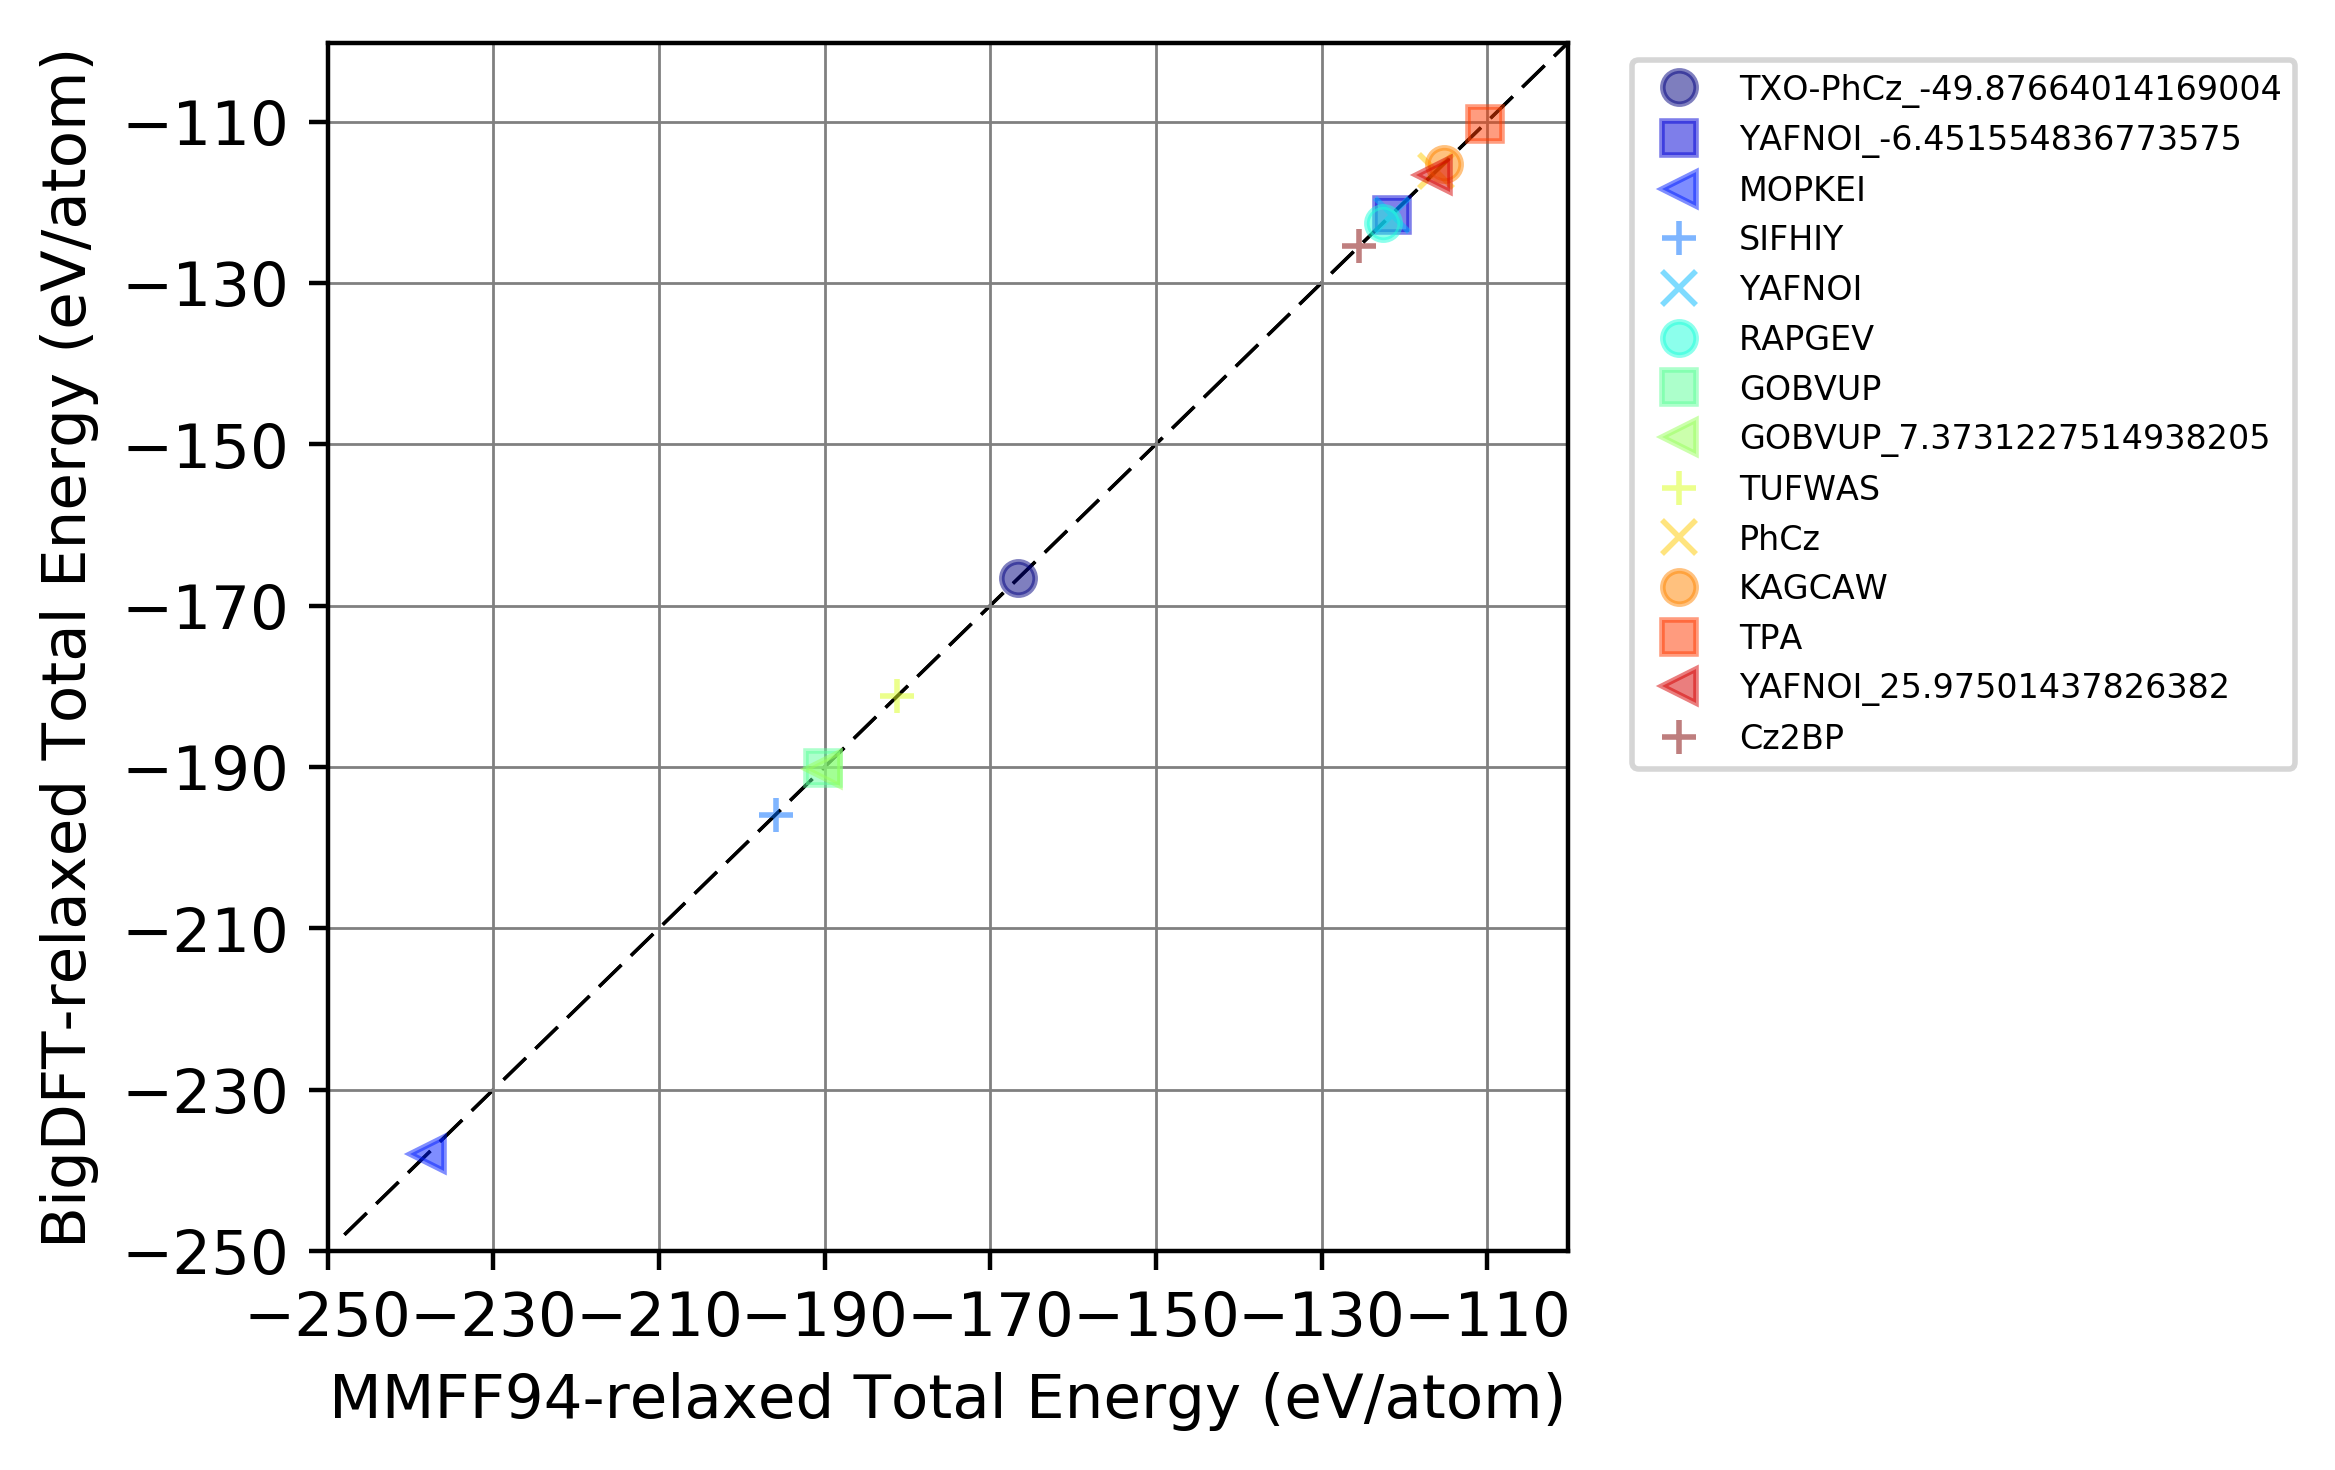

In [16]:
plt.figure(figsize=(4,4),dpi=1)

matplotlib.rcParams.update({'font.size': 11})

x_MMFF94 = []
y_BigDFT = []


for i, mol in enumerate(df_BigDFT["molecule"]):
    for j, mol2 in enumerate(df_MMFF94["molecule"]):
        if mol == mol2:
#             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
            y_BigDFT.append(df_BigDFT["Energy (eV)"][i])
            x_MMFF94.append(df_MMFF94["Energy (eV)"][j])
            
            plt.plot(df_MMFF94["Energy (eV)"][j],df_BigDFT["Energy (eV)"][i],linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.ylabel('BigDFT-relaxed Total Energy (eV/atom)')
plt.xlabel('MMFF94-relaxed Total Energy (eV/atom)')

x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-10
x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+10


y_min = x_min
y_max = x_max

lims = [[x_min,y_min],[x_max,y_max]]

plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)
plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
          
plt.xticks(np.arange(x_min-2, x_max, 20))
plt.yticks(np.arange(x_min-2, x_max, 20))
            
plt.legend(bbox_to_anchor=(1.6, 1),prop={'size': 6})
plt.show()

In [17]:
print len(df_MMFF94["LUMO-HOMO"])
np.linspace(0,len(df_MMFF94["LUMO-HOMO"]),len(df_MMFF94["LUMO-HOMO"]))

25


array([  0.        ,   1.04166667,   2.08333333,   3.125     ,
         4.16666667,   5.20833333,   6.25      ,   7.29166667,
         8.33333333,   9.375     ,  10.41666667,  11.45833333,
        12.5       ,  13.54166667,  14.58333333,  15.625     ,
        16.66666667,  17.70833333,  18.75      ,  19.79166667,
        20.83333333,  21.875     ,  22.91666667,  23.95833333,  25.        ])

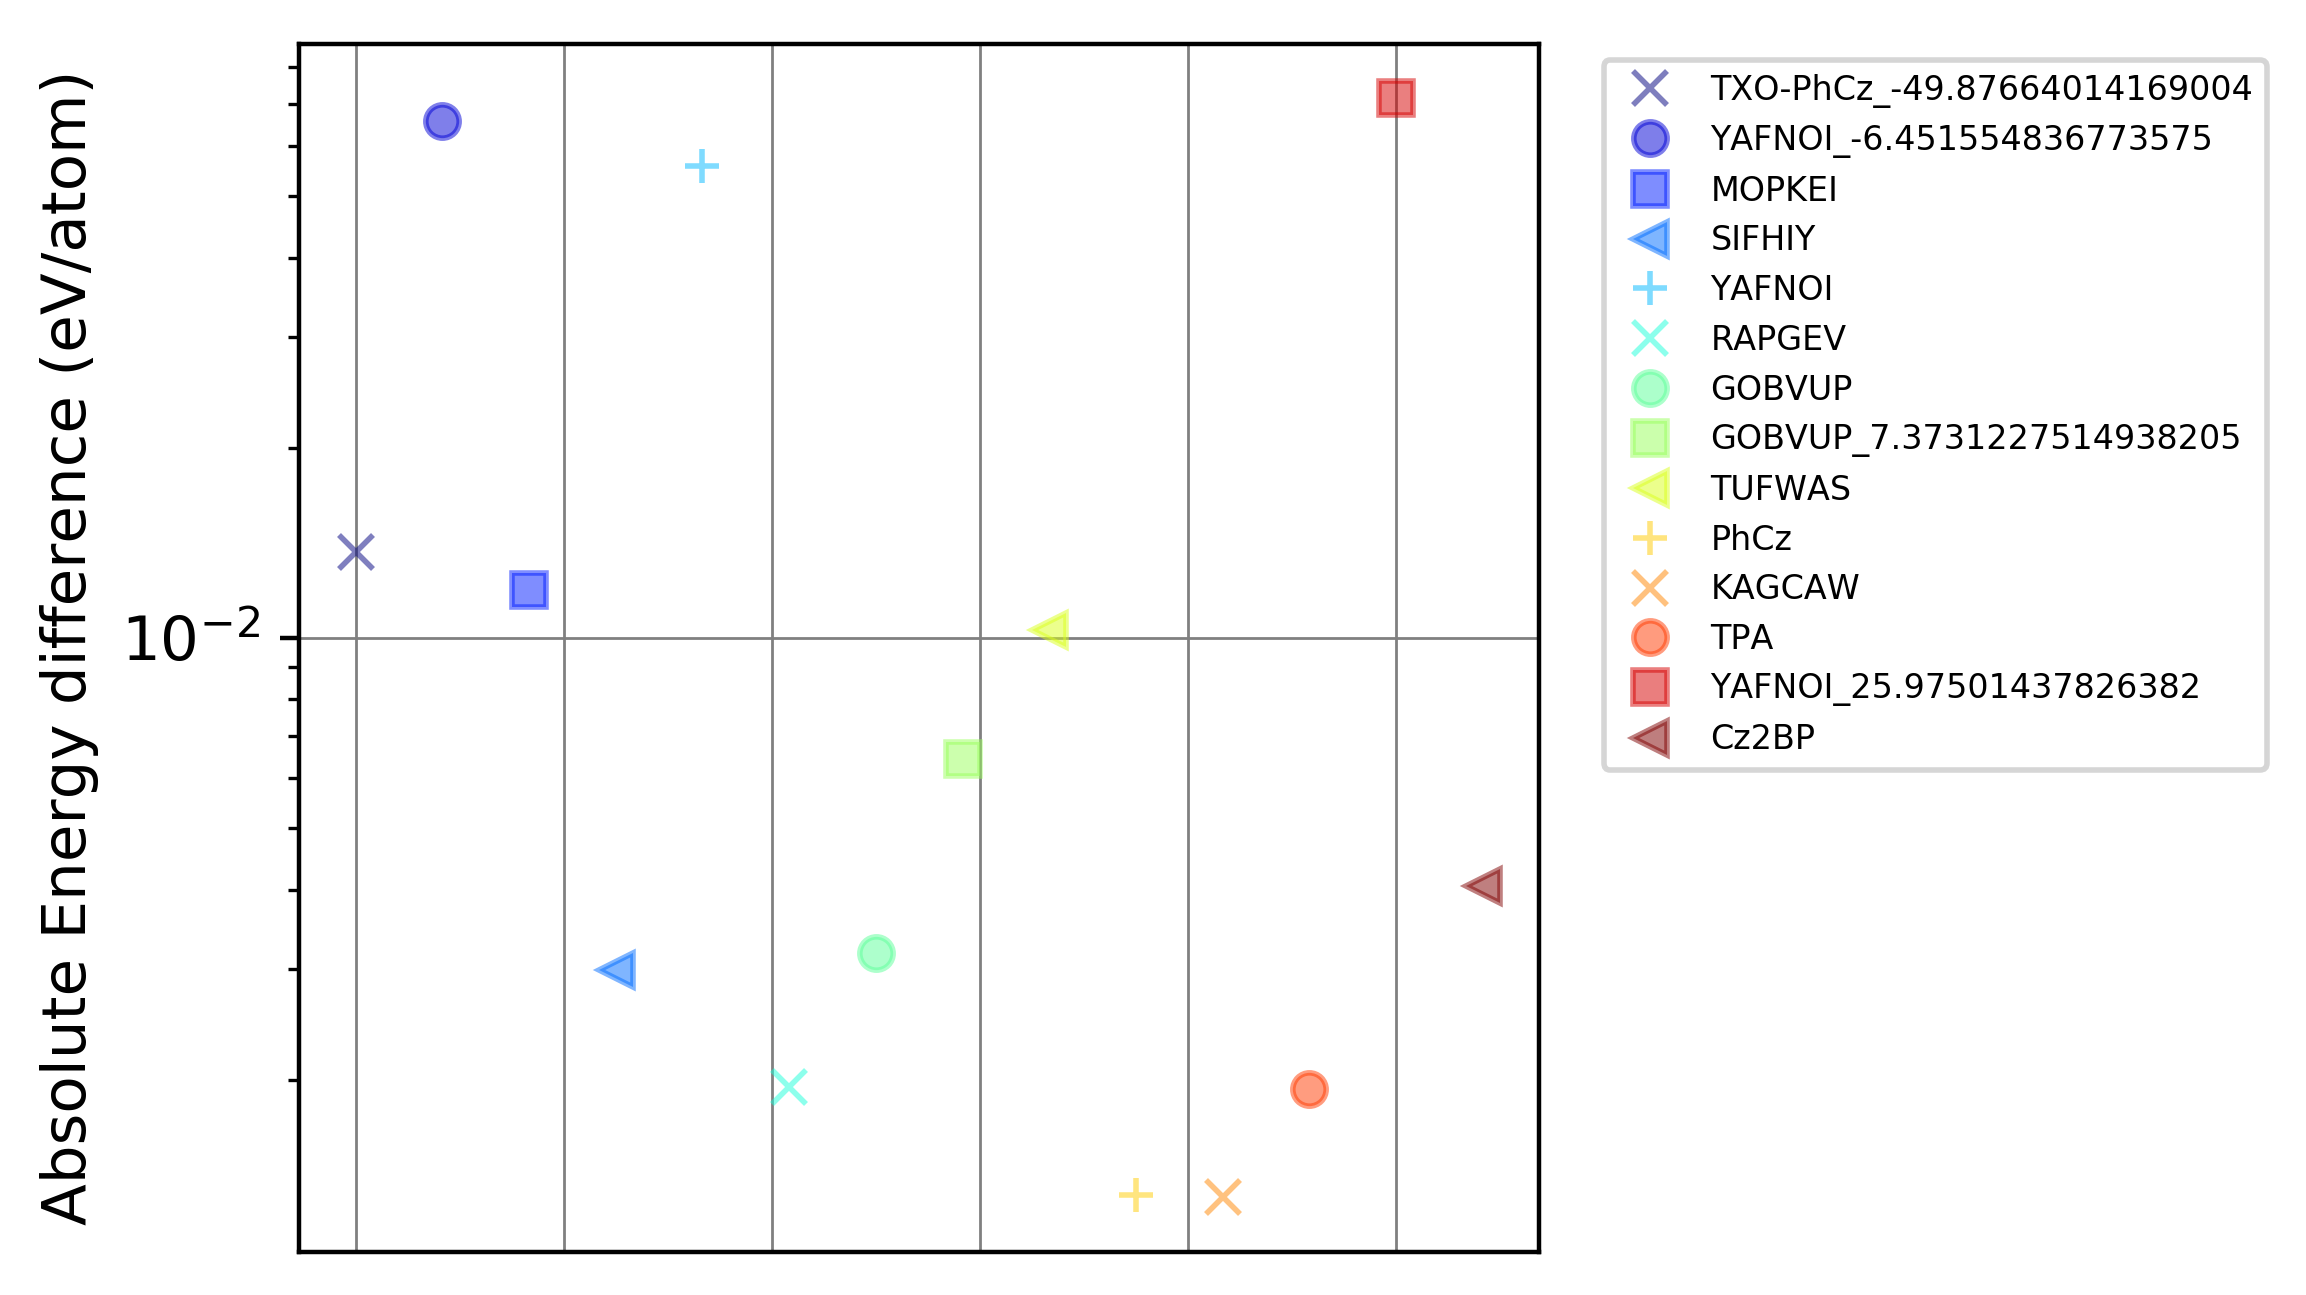

In [18]:
plt.figure(figsize=(4,4),dpi=1)

matplotlib.rcParams.update({'font.size': 11})

x_MMFF94 = []
y_BigDFT = []


for i, mol in enumerate(df_BigDFT["molecule"]):
    for j, mol2 in enumerate(df_MMFF94["molecule"]):
        if mol == mol2:
#             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
            y_BigDFT.append(df_BigDFT["Energy (eV)"][i])
            x_MMFF94.append(df_MMFF94["Energy (eV)"][j])
            
            x = np.linspace(0,len(df_MMFF94["LUMO-HOMO"]),len(df_MMFF94["LUMO-HOMO"]))[i]
            y = abs(df_MMFF94["Energy (eV)"][j]-df_BigDFT["Energy (eV)"][i])
            
            plt.plot(x,y,linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.ylabel('Absolute Energy difference (eV/atom)')
# plt.xlabel('MMFF94, Total Energy (eV)')

# x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-10
# x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+10


y_min = x_min
y_max = x_max

# lims = [[x_min,y_min],[x_max,y_max]]

plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

# plt.xlim([x_min,x_max])
# plt.ylim([y_min,y_max])
          
# plt.xticks()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
# plt.yticks(np.arange(x_min-2, x_max, 20))
            
plt.legend(bbox_to_anchor=(1.6, 1),prop={'size': 6})
plt.yscale('log')
plt.show()

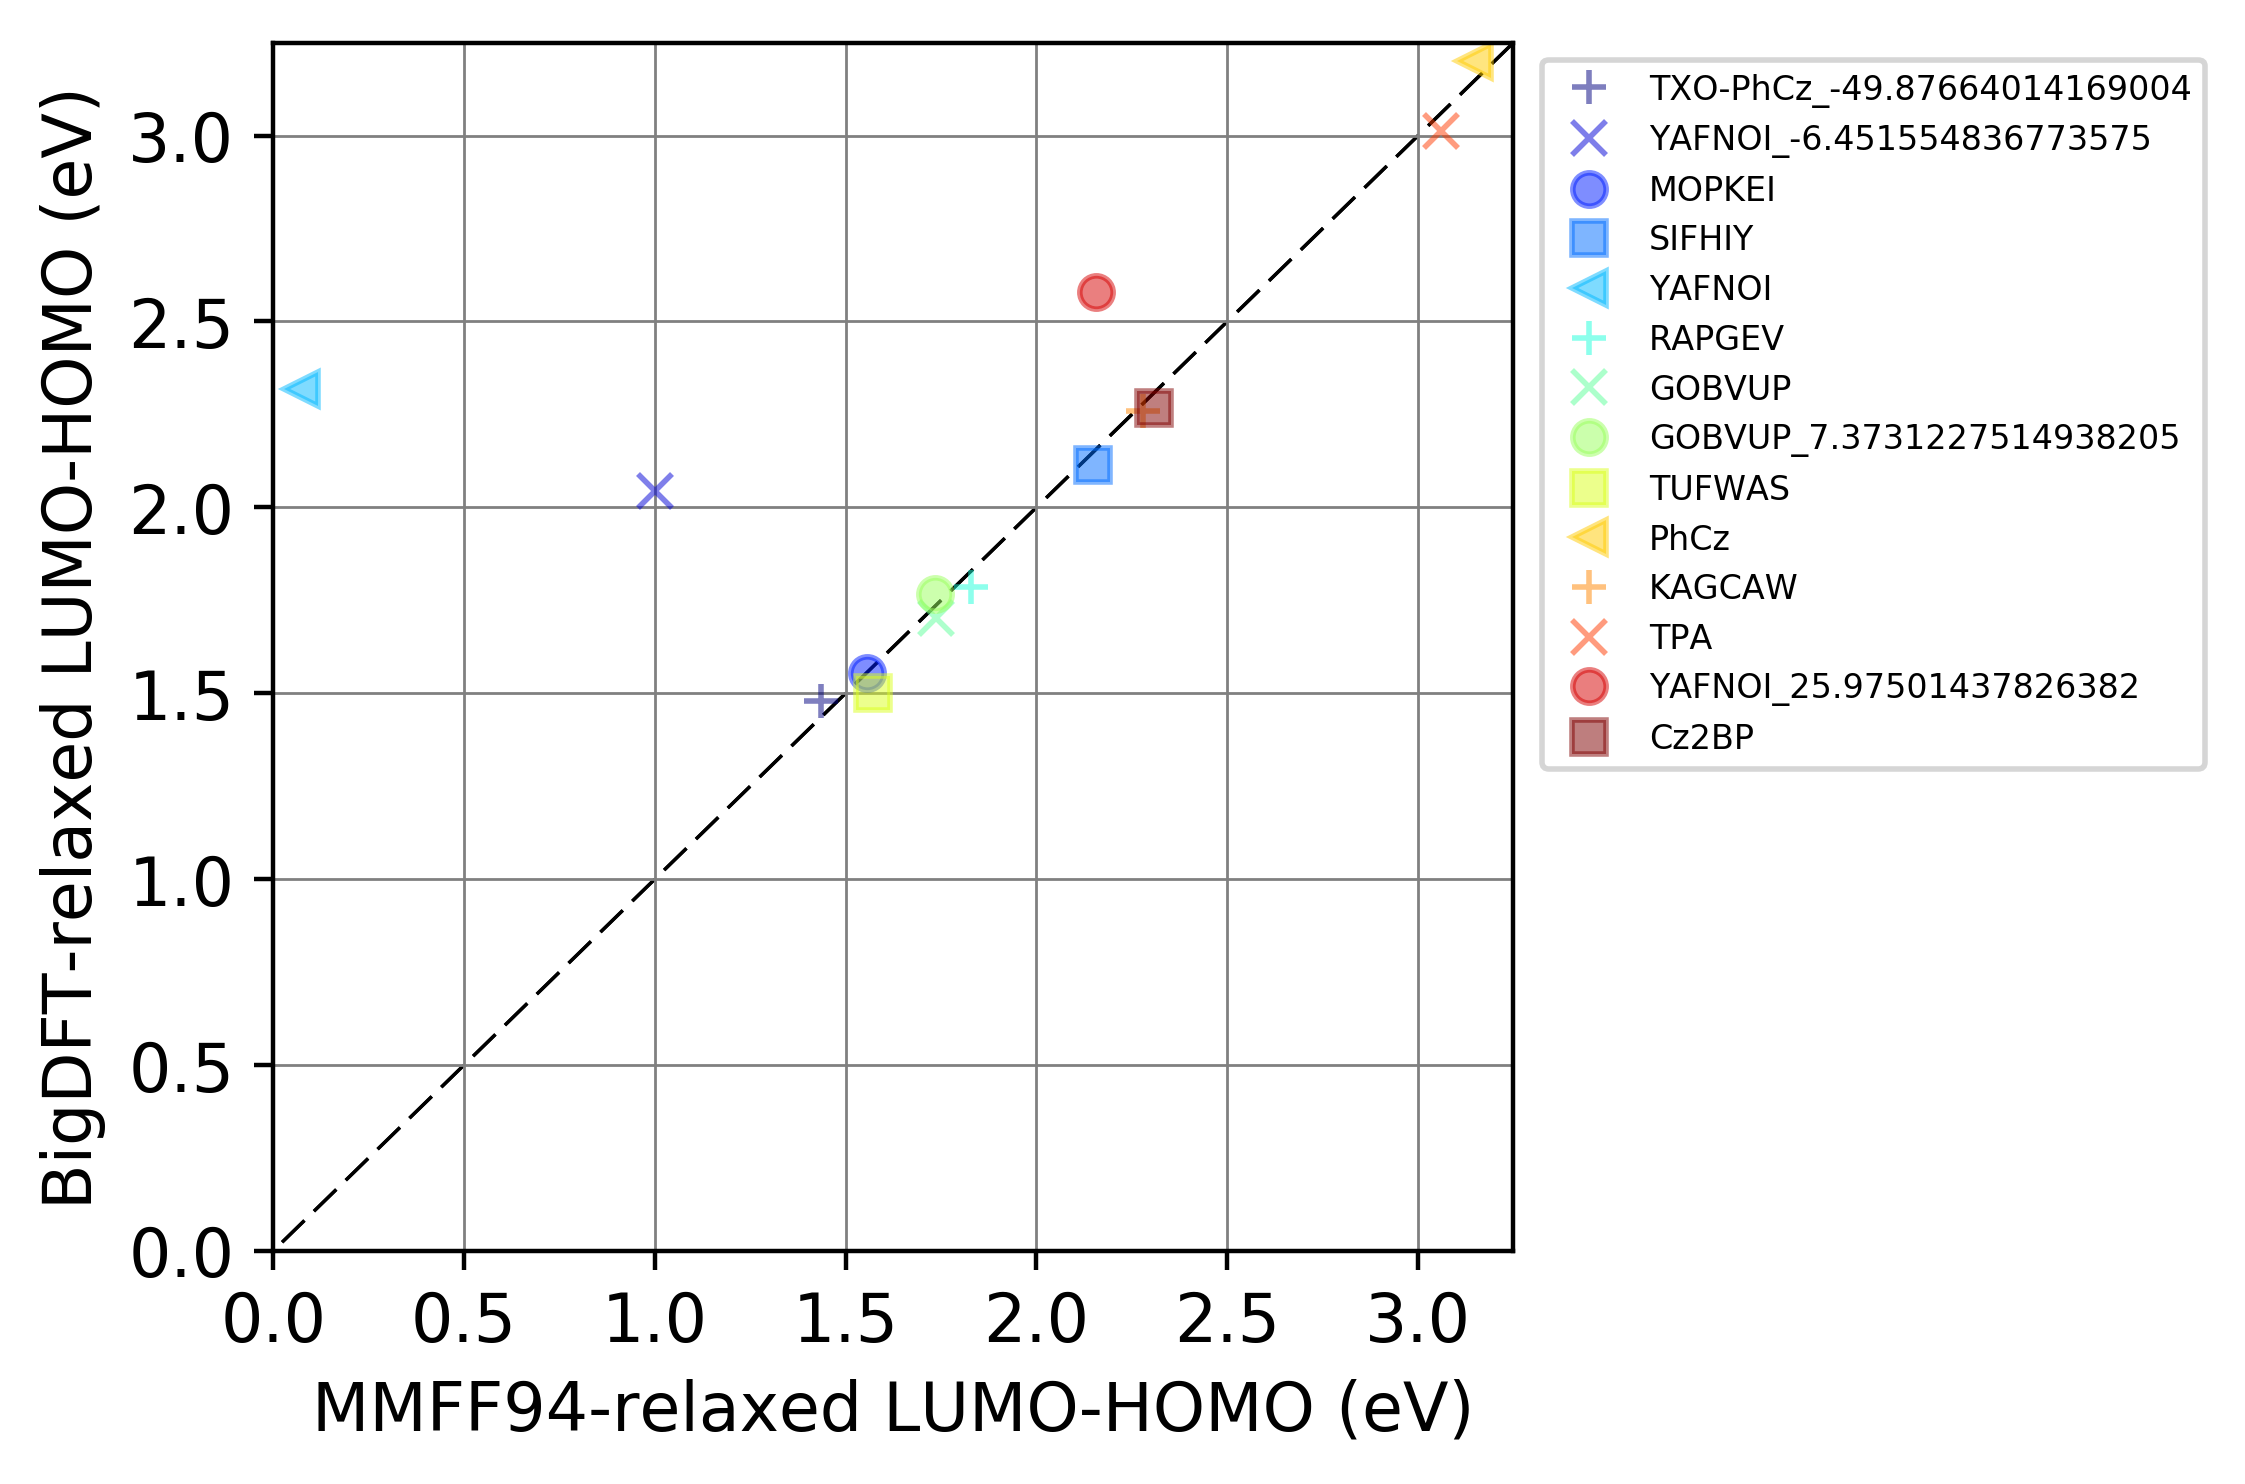

In [19]:
plt.figure(figsize=(4,4),dpi=1)

matplotlib.rcParams.update({'font.size': 12})

y_BigDFT = []
x_MMFF94 = []

for i, mol in enumerate(df_BigDFT["molecule"]):
    for j, mol2 in enumerate(df_MMFF94["molecule"]):
        if mol == mol2:
#             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
            y_BigDFT.append(df_BigDFT["LUMO-HOMO"][i])
            x_MMFF94.append(df_MMFF94["LUMO-HOMO"][j])
            
            plt.plot(df_MMFF94["LUMO-HOMO"][j],df_BigDFT["LUMO-HOMO"][i],linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.ylabel('BigDFT-relaxed LUMO-HOMO (eV)')
plt.xlabel('MMFF94-relaxed LUMO-HOMO (eV)')

x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-0.05
x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+0.05

y_min = x_min
y_max = x_max

lims = [[x_min,y_min],[x_max,y_max]]

plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)
plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
          
plt.xticks(np.arange(0, 3.5, .5))
plt.yticks(np.arange(0, 3.5, .5))
            
plt.legend(bbox_to_anchor=(1.01, 1),prop={'size': 6})
plt.show()

Mean absolute position deviation

`mad = median(abs(a - median(a)))`

$MAD_{i,j,k}=\sum_{n}^{m}{|a_{i,j,k}-b_{i,j,k}|}$ where $n$ and $m$ are atoms, $a$ BigDFT-relaxed coordinates, $b$ MMFF94-relaxed coordinates, $i,j,k$ represents $x,y,z$ coordinates.

In [20]:
# def mad(arr, axis=None, keepdims=True):
#     median = np.median(arr, axis=axis, keepdims=True)
#     mad = np.median(np.abs(arr-median),axis=axis, keepdims=keepdims)
#     return mad

In [35]:
data_pos = {}
data_pos['Molecule'] = []
data_pos['MAD of position'] = []
# data_pos['MAD of position x (angstrom)'] = []
# data_pos['MAD of position y (angstrom)'] = []
# data_pos['MAD of position z (angstrom)'] = []
for file in os.listdir('BigDFT_geopt_files'):
    if 'xyz' in file:        
        
        bigdft_xyz = file.replace('final_','').replace('_PBE_s0xyz_cubic.xyz','')
        name = bigdft_xyz
   
        for file2 in os.listdir('MMFF94_geopt_files'):
            
            if bigdft_xyz == file2.replace('_MMFF94_geopt.xyz',''):
   
                xyz_text = []
                
           # Reading BigDFT xyz files
                with open(file,'r') as f:
                    
                    copy=False
                    
                    for line in f:
                        if line.startswith('free'):
                            copy=True
                        elif line.strip().endswith('forces'):
                            copy=False
                        elif copy:
                            xyz_text.append(line.split()[1:][0:3])
                
#                 calculate MAD 
                xyz_pos = np.array(xyz_text).astype(np.float)
                bg_dft_pos = xyz_pos
            
                method = 'BigDFT'
            

                xyz_text = []
                    
                # Reading MMFF xyz files         
                with open(file2,'r') as f:
                    
                    copy=False
                    
                    for line in f:
                        if line.startswith('free'):
                            copy=True
                        elif copy:
                            xyz_text.append(line.split()[1:])
                            
#                 calculated MAD
                xyz_pos = np.array(xyz_text).astype(np.float)
                ff_dft_pos = xyz_pos
                
                method = 'MMFF94'
                data_pos['Molecule'].append(name)
                
#                 MAD = sum(abs(bg_dft_pos - ff_dft_pos))
                MAD = abs( sum(sum(bg_dft_pos))-sum(sum(ff_dft_pos)))
                print MAD, sum(sum(bg_dft_pos)), sum(sum(ff_dft_pos))
                
#                 data_pos['MAD of position x (angstrom)'].append(MAD[0])
#                 data_pos['MAD of position y (angstrom)'].append(MAD[1])
#                 data_pos['MAD of position z (angstrom)'].append(MAD[2])
                data_pos['MAD of position'].append(MAD)

1.15463194561e-14 1.594843 1.594843
3.63409302651e-12 1.9999963633e-06 1.99999999739e-06
1.42663658664e-14 0.175475 0.175475
4.495746 -1.99999998118e-06 4.495744
4.50096904192e-12 -1.99999550091e-06 -2.00000000188e-06
5.88418203051e-14 -1.773735 -1.773735
4.4408920985e-16 0.841127 0.841127
5.99520433298e-15 -1.635885 -1.635885
1.4156453787e-12 -3.00000140929e-06 -2.99999999365e-06
3.21076498722e-13 -1.99999967876e-06 -1.99999999984e-06
8.881784197e-15 -2.00000001449e-06 -2.00000000561e-06
1.01751940207e-13 1.00000010728e-06 1.00000000552e-06
1.44328993201e-15 -1.99999999939e-06 -2.00000000083e-06
1.05382369497e-12 2.480516 2.480516


In [37]:
df_pos = pd.DataFrame(data_pos)
df_pos

MAD of position                     Molecule
0      1.154632e-14  TXO-PhCz_-49.87664014169004
1      3.634093e-12    YAFNOI_-6.451554836773575
2      1.426637e-14                       MOPKEI
3      4.495746e+00                       SIFHIY
4      4.500969e-12                       YAFNOI
5      5.884182e-14                       RAPGEV
6      4.440892e-16                       GOBVUP
7      5.995204e-15    GOBVUP_7.3731227514938205
8      1.415645e-12                       TUFWAS
9      3.210765e-13                         PhCz
10     8.881784e-15                       KAGCAW
11     1.017519e-13                          TPA
12     1.443290e-15     YAFNOI_25.97501437826382
13     1.053824e-12                        Cz2BP

In [23]:
# plt.figure(figsize=(4,4),dpi=1)

# matplotlib.rcParams.update({'font.size': 12})

# y_BigDFT = []
# x_MMFF94 = []

# for i, mol in enumerate(df_pos_BigDFT["Molecule"]):
#     for j, mol2 in enumerate(df_pos_MMFF94["Molecule"]):
#         if mol == mol2:
# #             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
#             y_BigDFT.append(df_pos_BigDFT["MAD of position (angstrom)"][i])
#             x_MMFF94.append(df_pos_MMFF94["MAD of position (angstrom)"][j])
            
#             plt.plot(df_pos_MMFF94["MAD of position (angstrom)"][j],df_pos_BigDFT["MAD of position (angstrom)"][i],linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# # x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# # x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


# plt.ylabel('BigDFT-relaxed MAD of position (angstrom)')
# plt.xlabel('MMFF94-relaxed MAD of position (angstrom)')

# x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-0.05
# x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+0.05

# y_min = x_min
# y_max = x_max

# lims = [[x_min,y_min],[x_max,y_max]]

# plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)
# plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

# plt.xlim([x_min,x_max])
# plt.ylim([y_min,y_max])
          
# plt.xticks(np.arange(0.65, 3, .5))
# plt.yticks(np.arange(0.65, 3, .5))

            
# plt.legend(bbox_to_anchor=(1.01, 1),prop={'size': 6})
# plt.show()

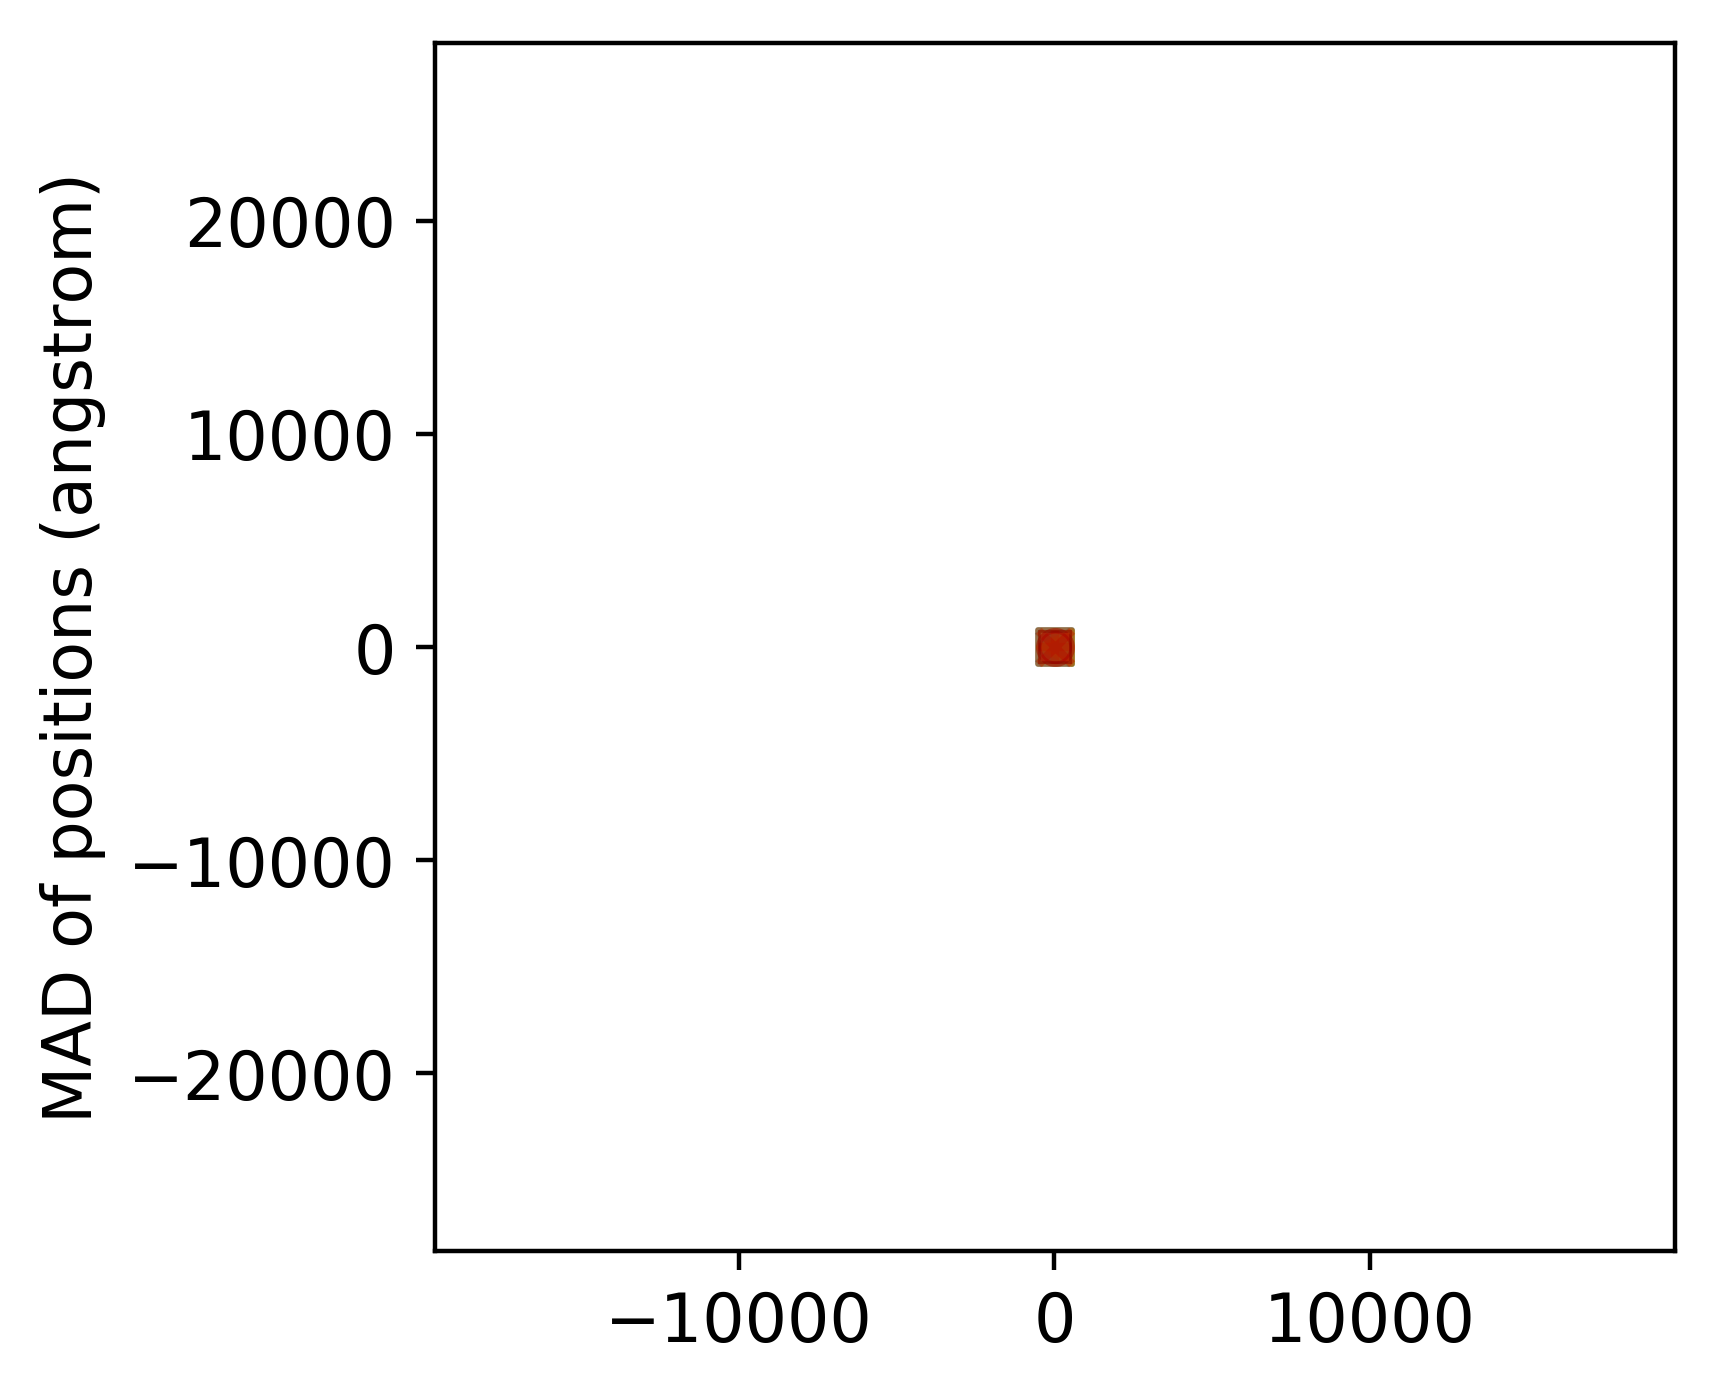

In [53]:
plt.figure(figsize=(4,4),dpi=1).tight_layout

matplotlib.rcParams.update({'font.size': 12})

for i, mol in enumerate(df_pos["Molecule"]):
#     list = abs([df_pos["MAD of position x (angstrom)"][i], df_pos["MAD of position y (angstrom)"][i], df_pos["MAD of position z (angstrom)"][i]])
#     plt.plot([1,2,3],list,linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)
    plt.scatter(i,df_pos['MAD of position'][i],marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.ylabel('MAD of positions (angstrom)')
# plt.xlabel('MMFF94-relaxed MAD of position (angstrom)')

# x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-0.05
# x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+0.05

# y_min = x_min
# y_max = x_max

# lims = [[x_min,y_min],[x_max,y_max]]

# plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)
# plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

# plt.xlim([x_min,x_max])
# plt.ylim([y_min,y_max])
          
# plt.xticks([1,2,3])
# plt.yticks(np.arange(0.65, 3, .5))

# plt.yscale('log')            
# plt.legend(bbox_to_anchor=(1.01, 1),prop={'size': 6})
plt.show()

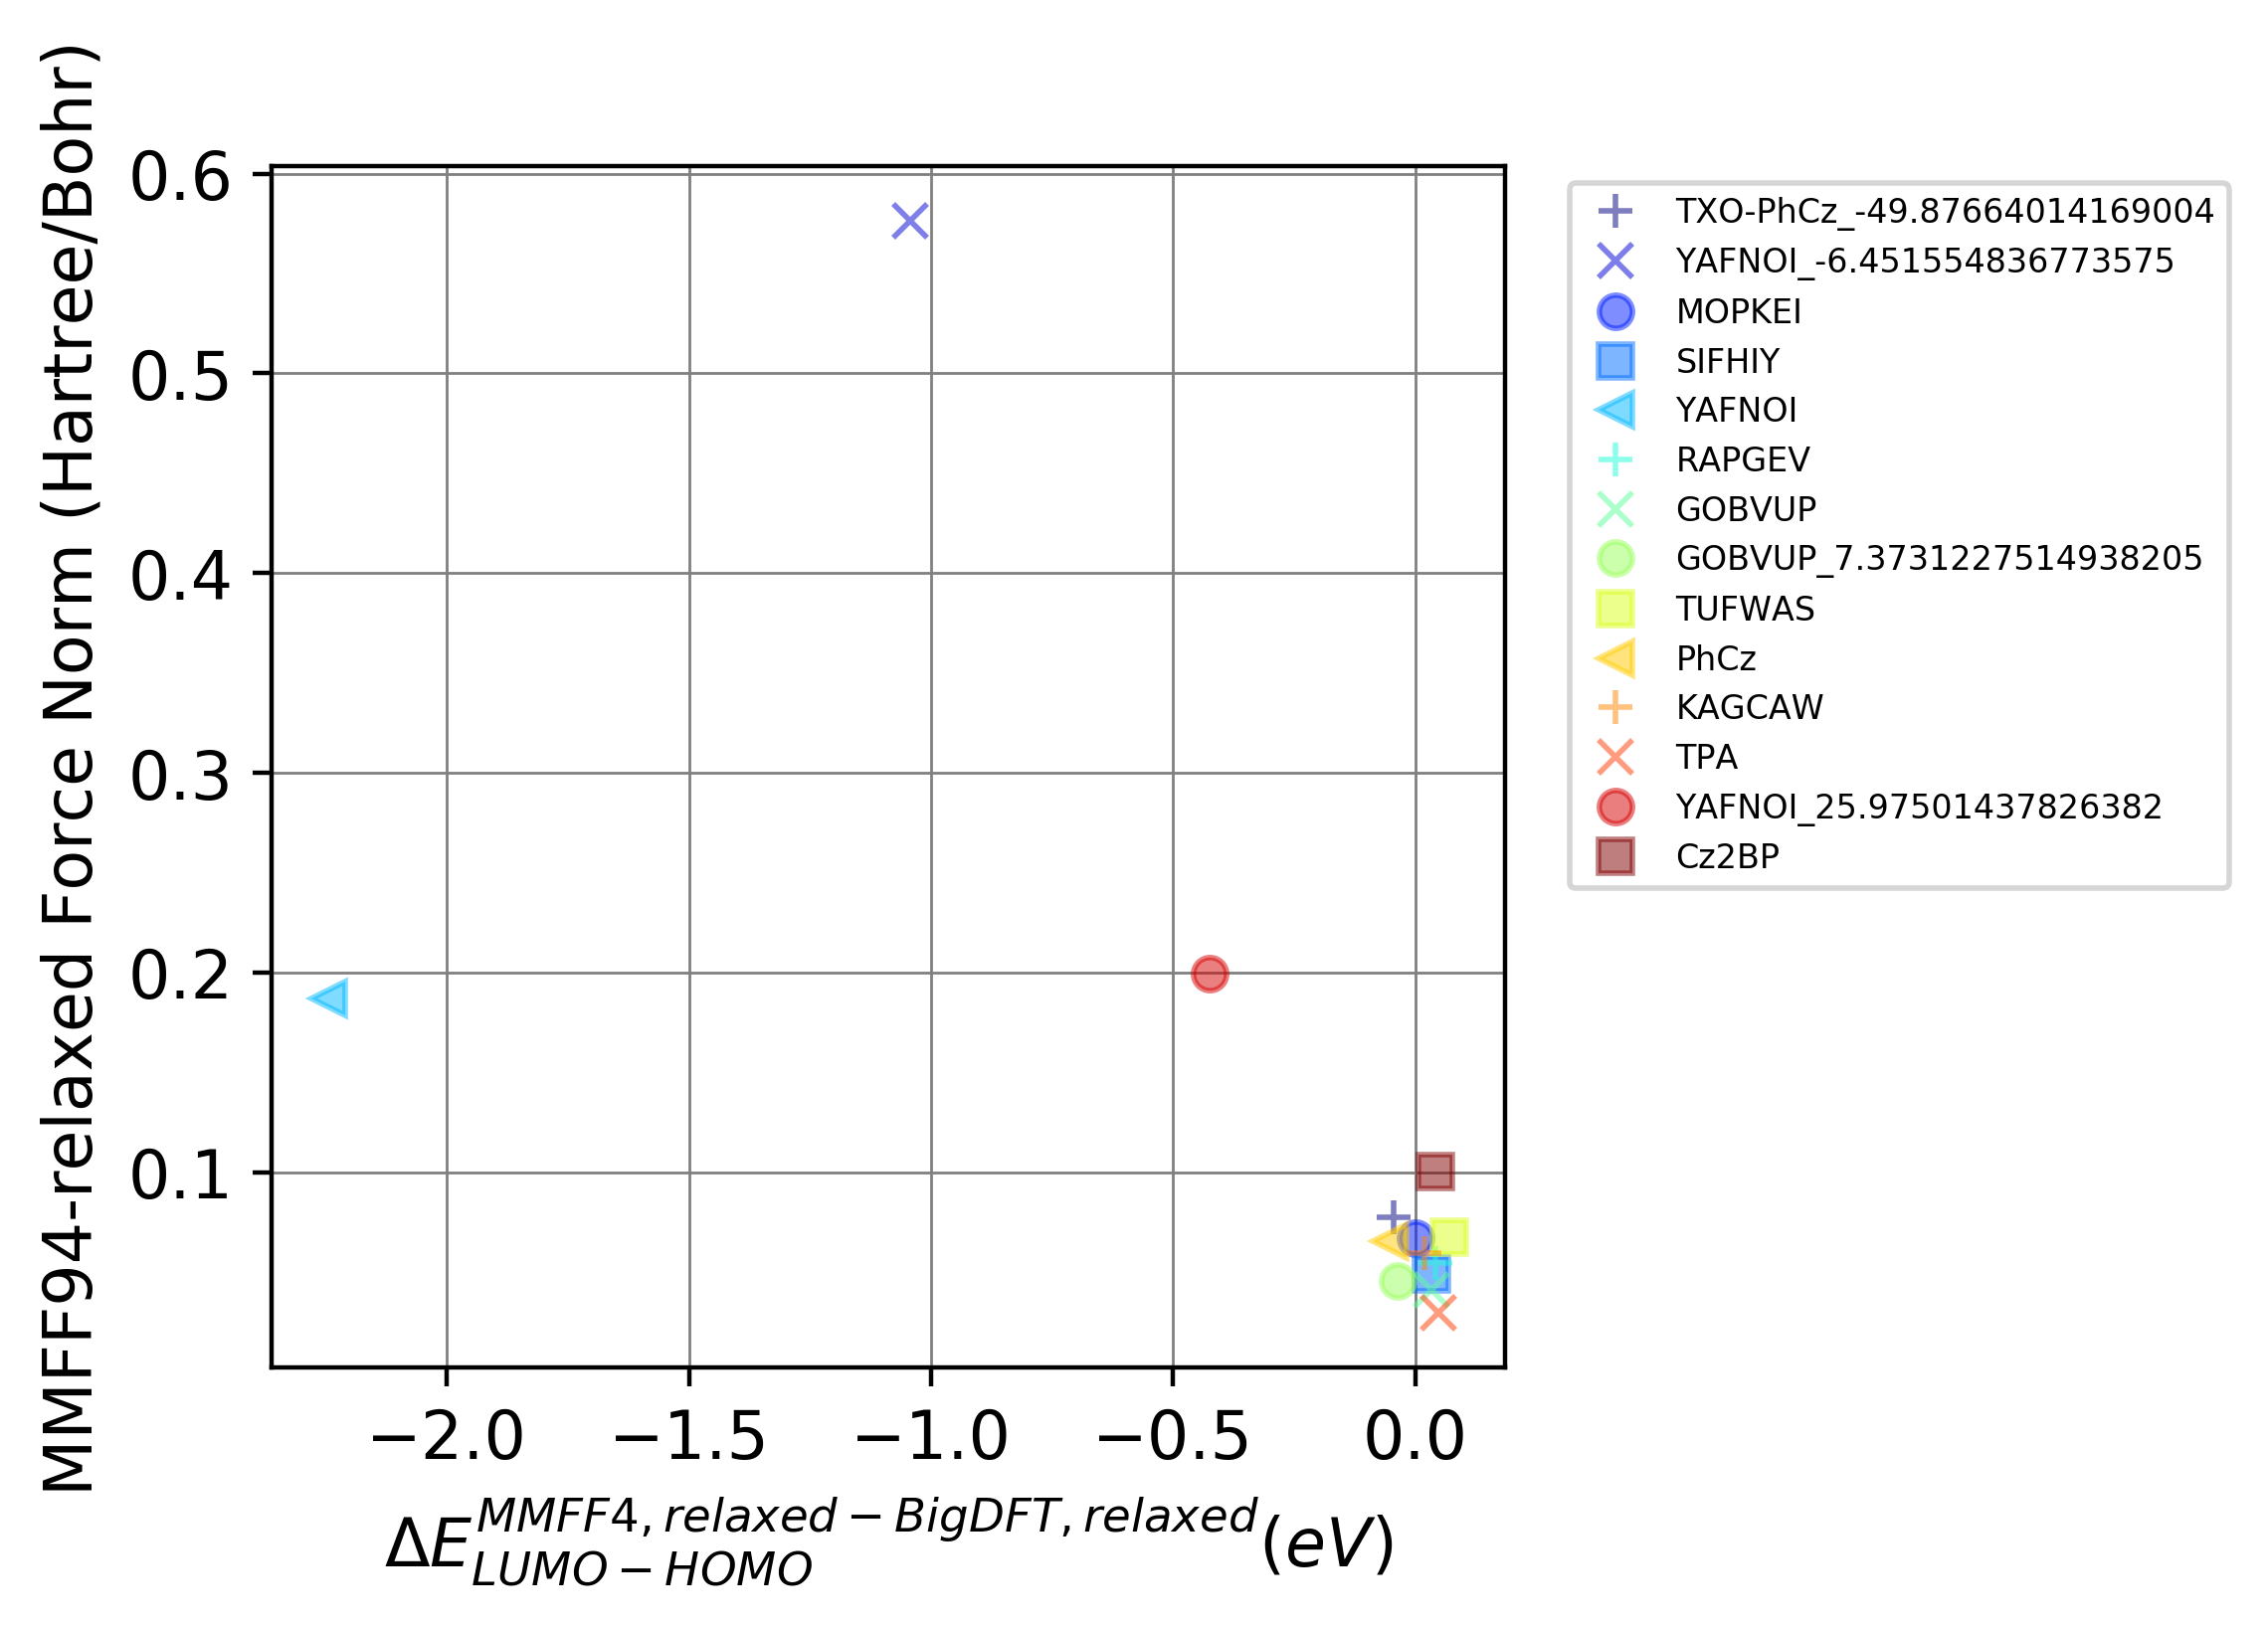

In [18]:
plt.figure(figsize=(4,4),dpi=1)

matplotlib.rcParams.update({'font.size': 12})

x_MMFF94 = []
y_BigDFT = []


for i, mol in enumerate(df_BigDFT["molecule"]):
    for j, mol2 in enumerate(df_MMFF94["molecule"]):
        if mol == mol2:
#             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
            y_BigDFT.append(df_MMFF94["Force Norm (Hartree/Bohr)"][j])
            x_MMFF94.append(df_MMFF94["LUMO-HOMO"][j]-df_BigDFT["LUMO-HOMO"][i])
            
            plt.plot((df_MMFF94["LUMO-HOMO"][j]-df_BigDFT["LUMO-HOMO"][i]),df_MMFF94["Force Norm (Hartree/Bohr)"][j],linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.ylabel('MMFF94-relaxed Force Norm (Hartree/Bohr)')
# plt.ylabel('$\Delta E_{MMFF4, relaxed-BigDFT, relaxed}= E_{L-H}^{MMFF4, relaxed} - E_{L-H}^{BigDFT, relaxed} (eV)$')
plt.xlabel('$\Delta E^{MMFF4, relaxed-BigDFT, relaxed}_{LUMO-HOMO}(eV)$')

x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-0.05
x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+0.05

y_min = x_min
y_max = x_max

lims = [[x_min,y_min],[x_max,y_max]]

plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

# plt.xlim([x_min,x_max])
# plt.ylim([y_min,y_max])
          
# plt.xticks(np.arange(x_min+.2, x_max,.2))
# plt.yticks(np.arange(x_min-2, x_max, .1))
            
plt.legend(bbox_to_anchor=(1.6, 1),prop={'size': 6})
plt.show()

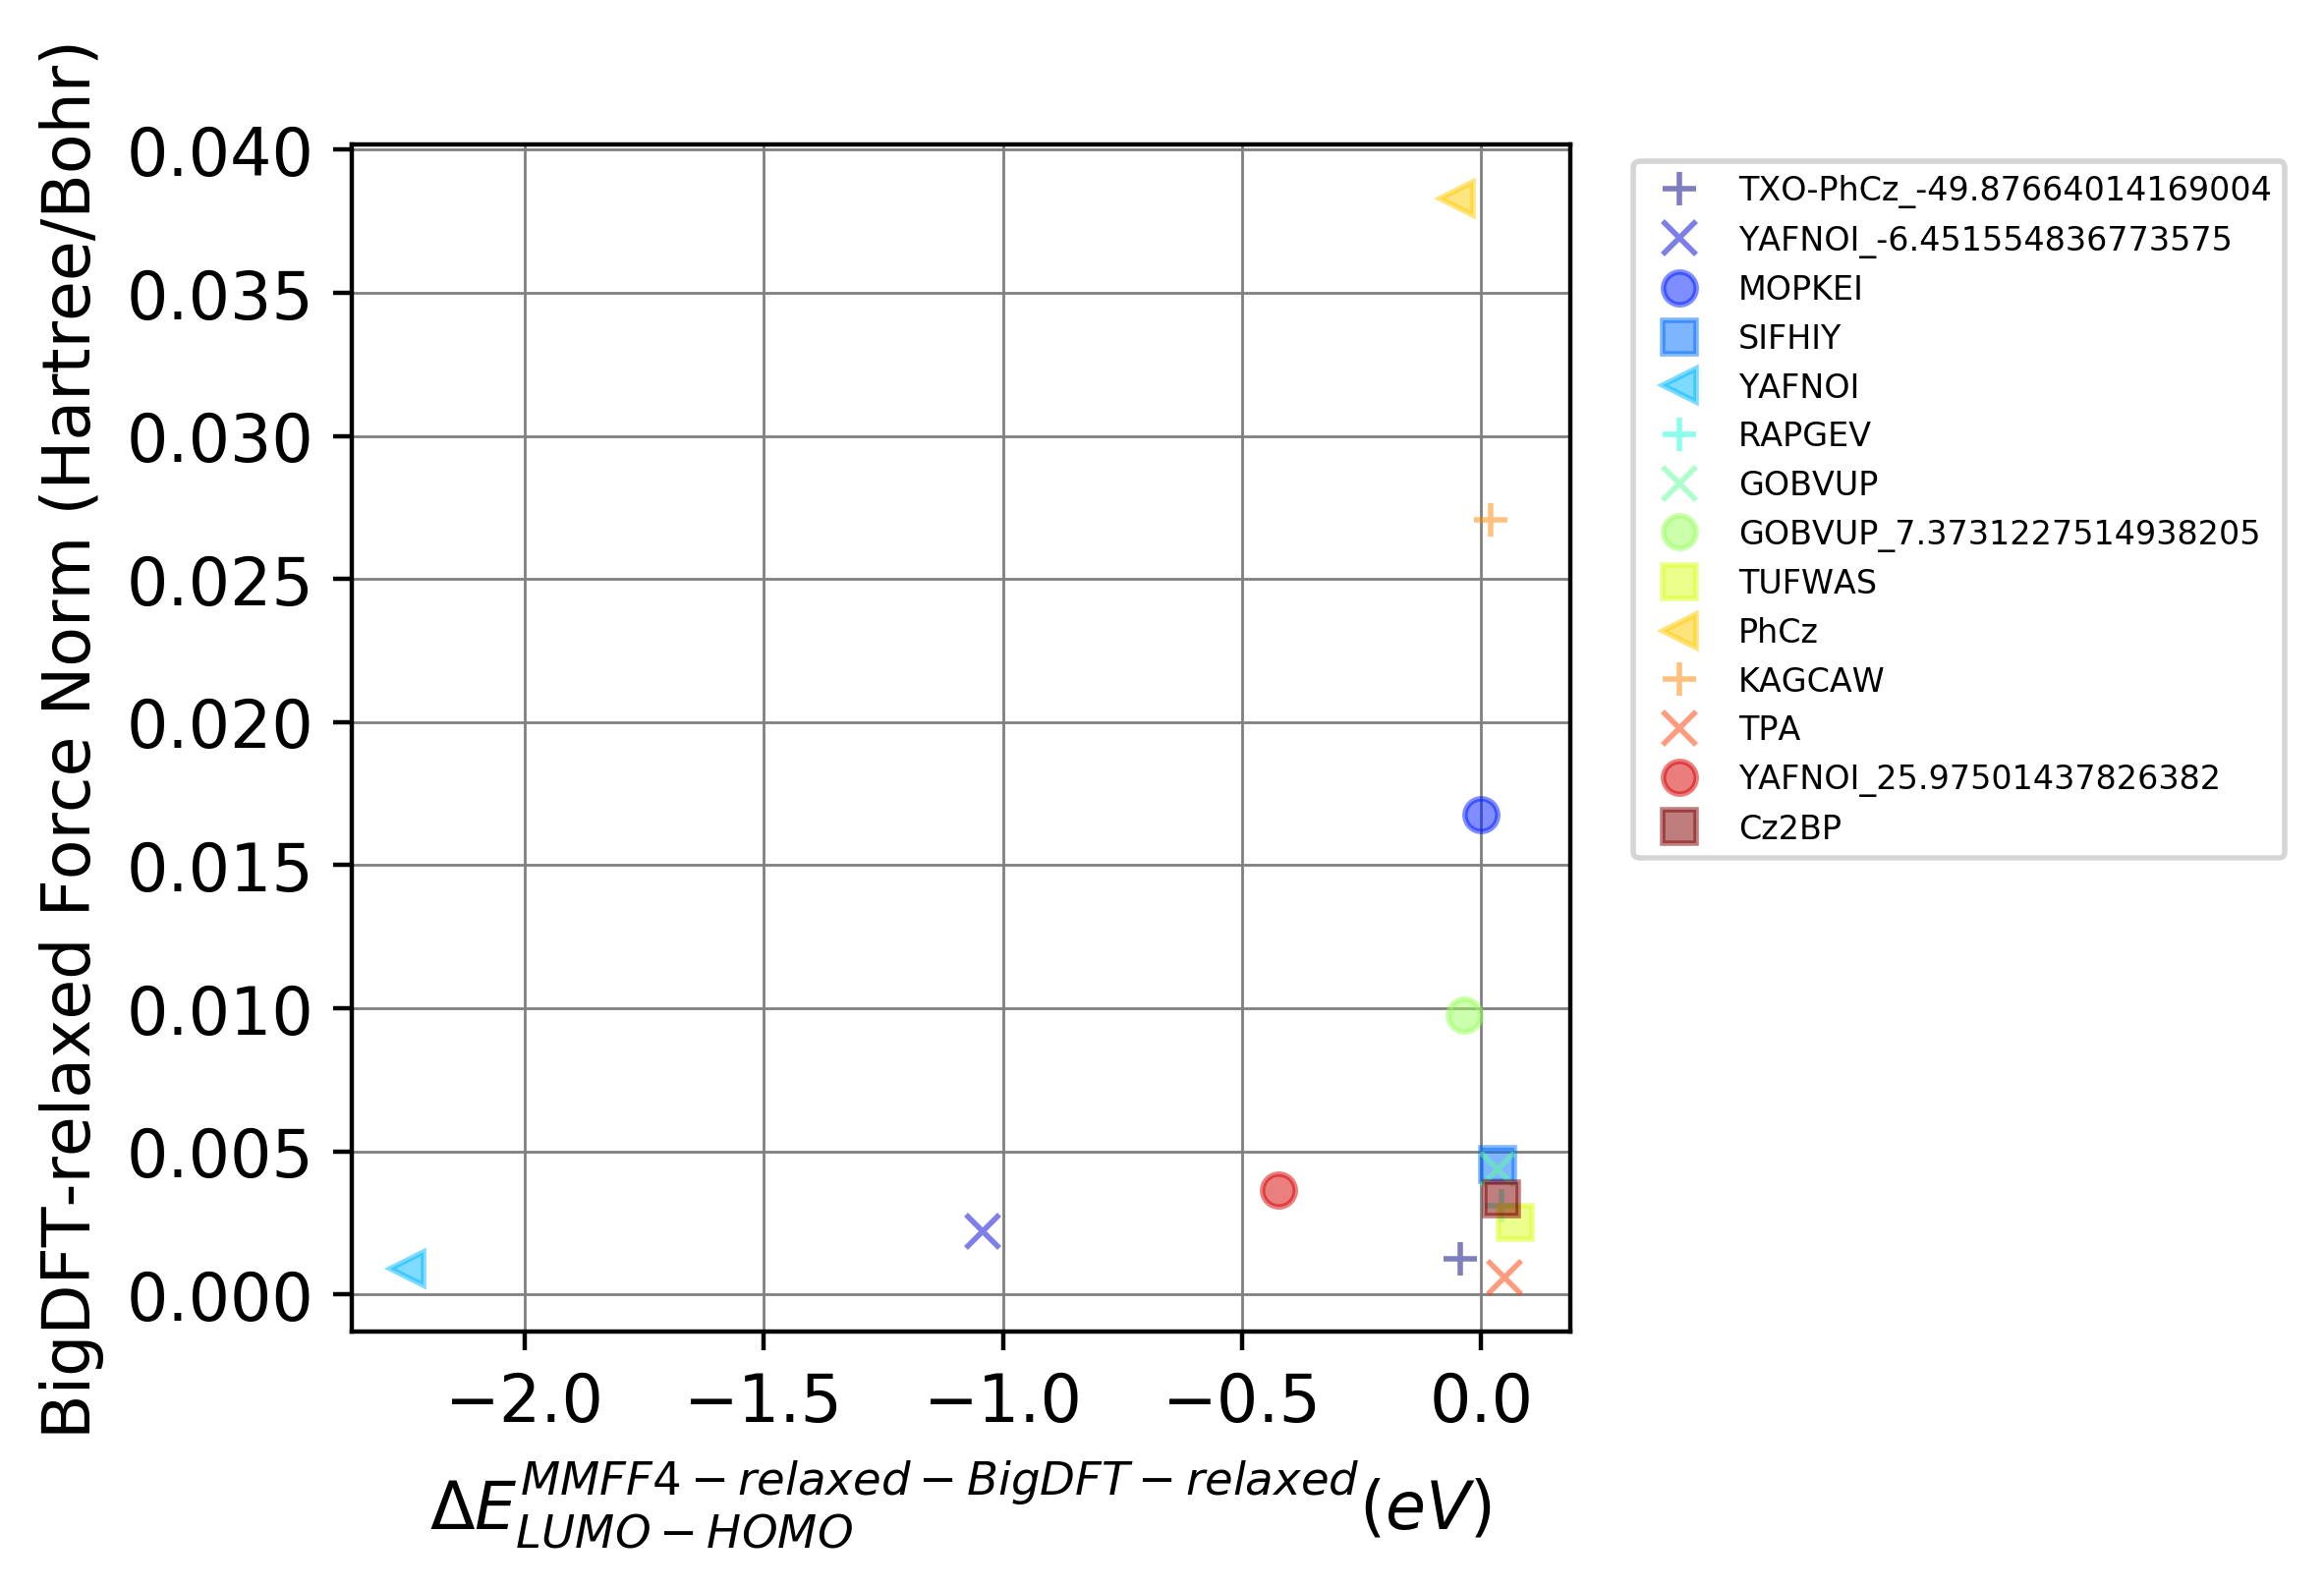

In [23]:
plt.figure(figsize=(4,4),dpi=1)

matplotlib.rcParams.update({'font.size': 12})

x_MMFF94 = []
y_BigDFT = []


for i, mol in enumerate(df_BigDFT["molecule"]):
    for j, mol2 in enumerate(df_MMFF94["molecule"]):
        if mol == mol2:
#             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
            y_BigDFT.append(df_BigDFT["Force Norm (Hartree/Bohr)"][i])
            x_MMFF94.append(df_MMFF94["LUMO-HOMO"][j]-df_BigDFT["LUMO-HOMO"][i])
            
            plt.plot((df_MMFF94["LUMO-HOMO"][j]-df_BigDFT["LUMO-HOMO"][i]),df_BigDFT["Force Norm (Hartree/Bohr)"][i],linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.ylabel('BigDFT-relaxed Force Norm (Hartree/Bohr)')
# plt.ylabel('$\Delta E_{MMFF4, relaxed-BigDFT, relaxed}= E_{L-H}^{MMFF4, relaxed} - E_{L-H}^{BigDFT, relaxed} (eV)$')
plt.xlabel('$\Delta E^{MMFF4-relaxed-BigDFT-relaxed}_{LUMO-HOMO}(eV)$')

x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-0.05
x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+0.05

y_min = x_min
y_max = x_max

lims = [[x_min,y_min],[x_max,y_max]]

plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

# plt.xlim([x_min,x_max])
# plt.ylim([y_min,y_max])
          
# plt.xticks(np.arange(x_min+.2, x_max,.2))
# plt.yticks(np.arange(x_min-2, x_max, .1))
            
plt.legend(bbox_to_anchor=(1.6, 1),prop={'size': 6})
plt.show()

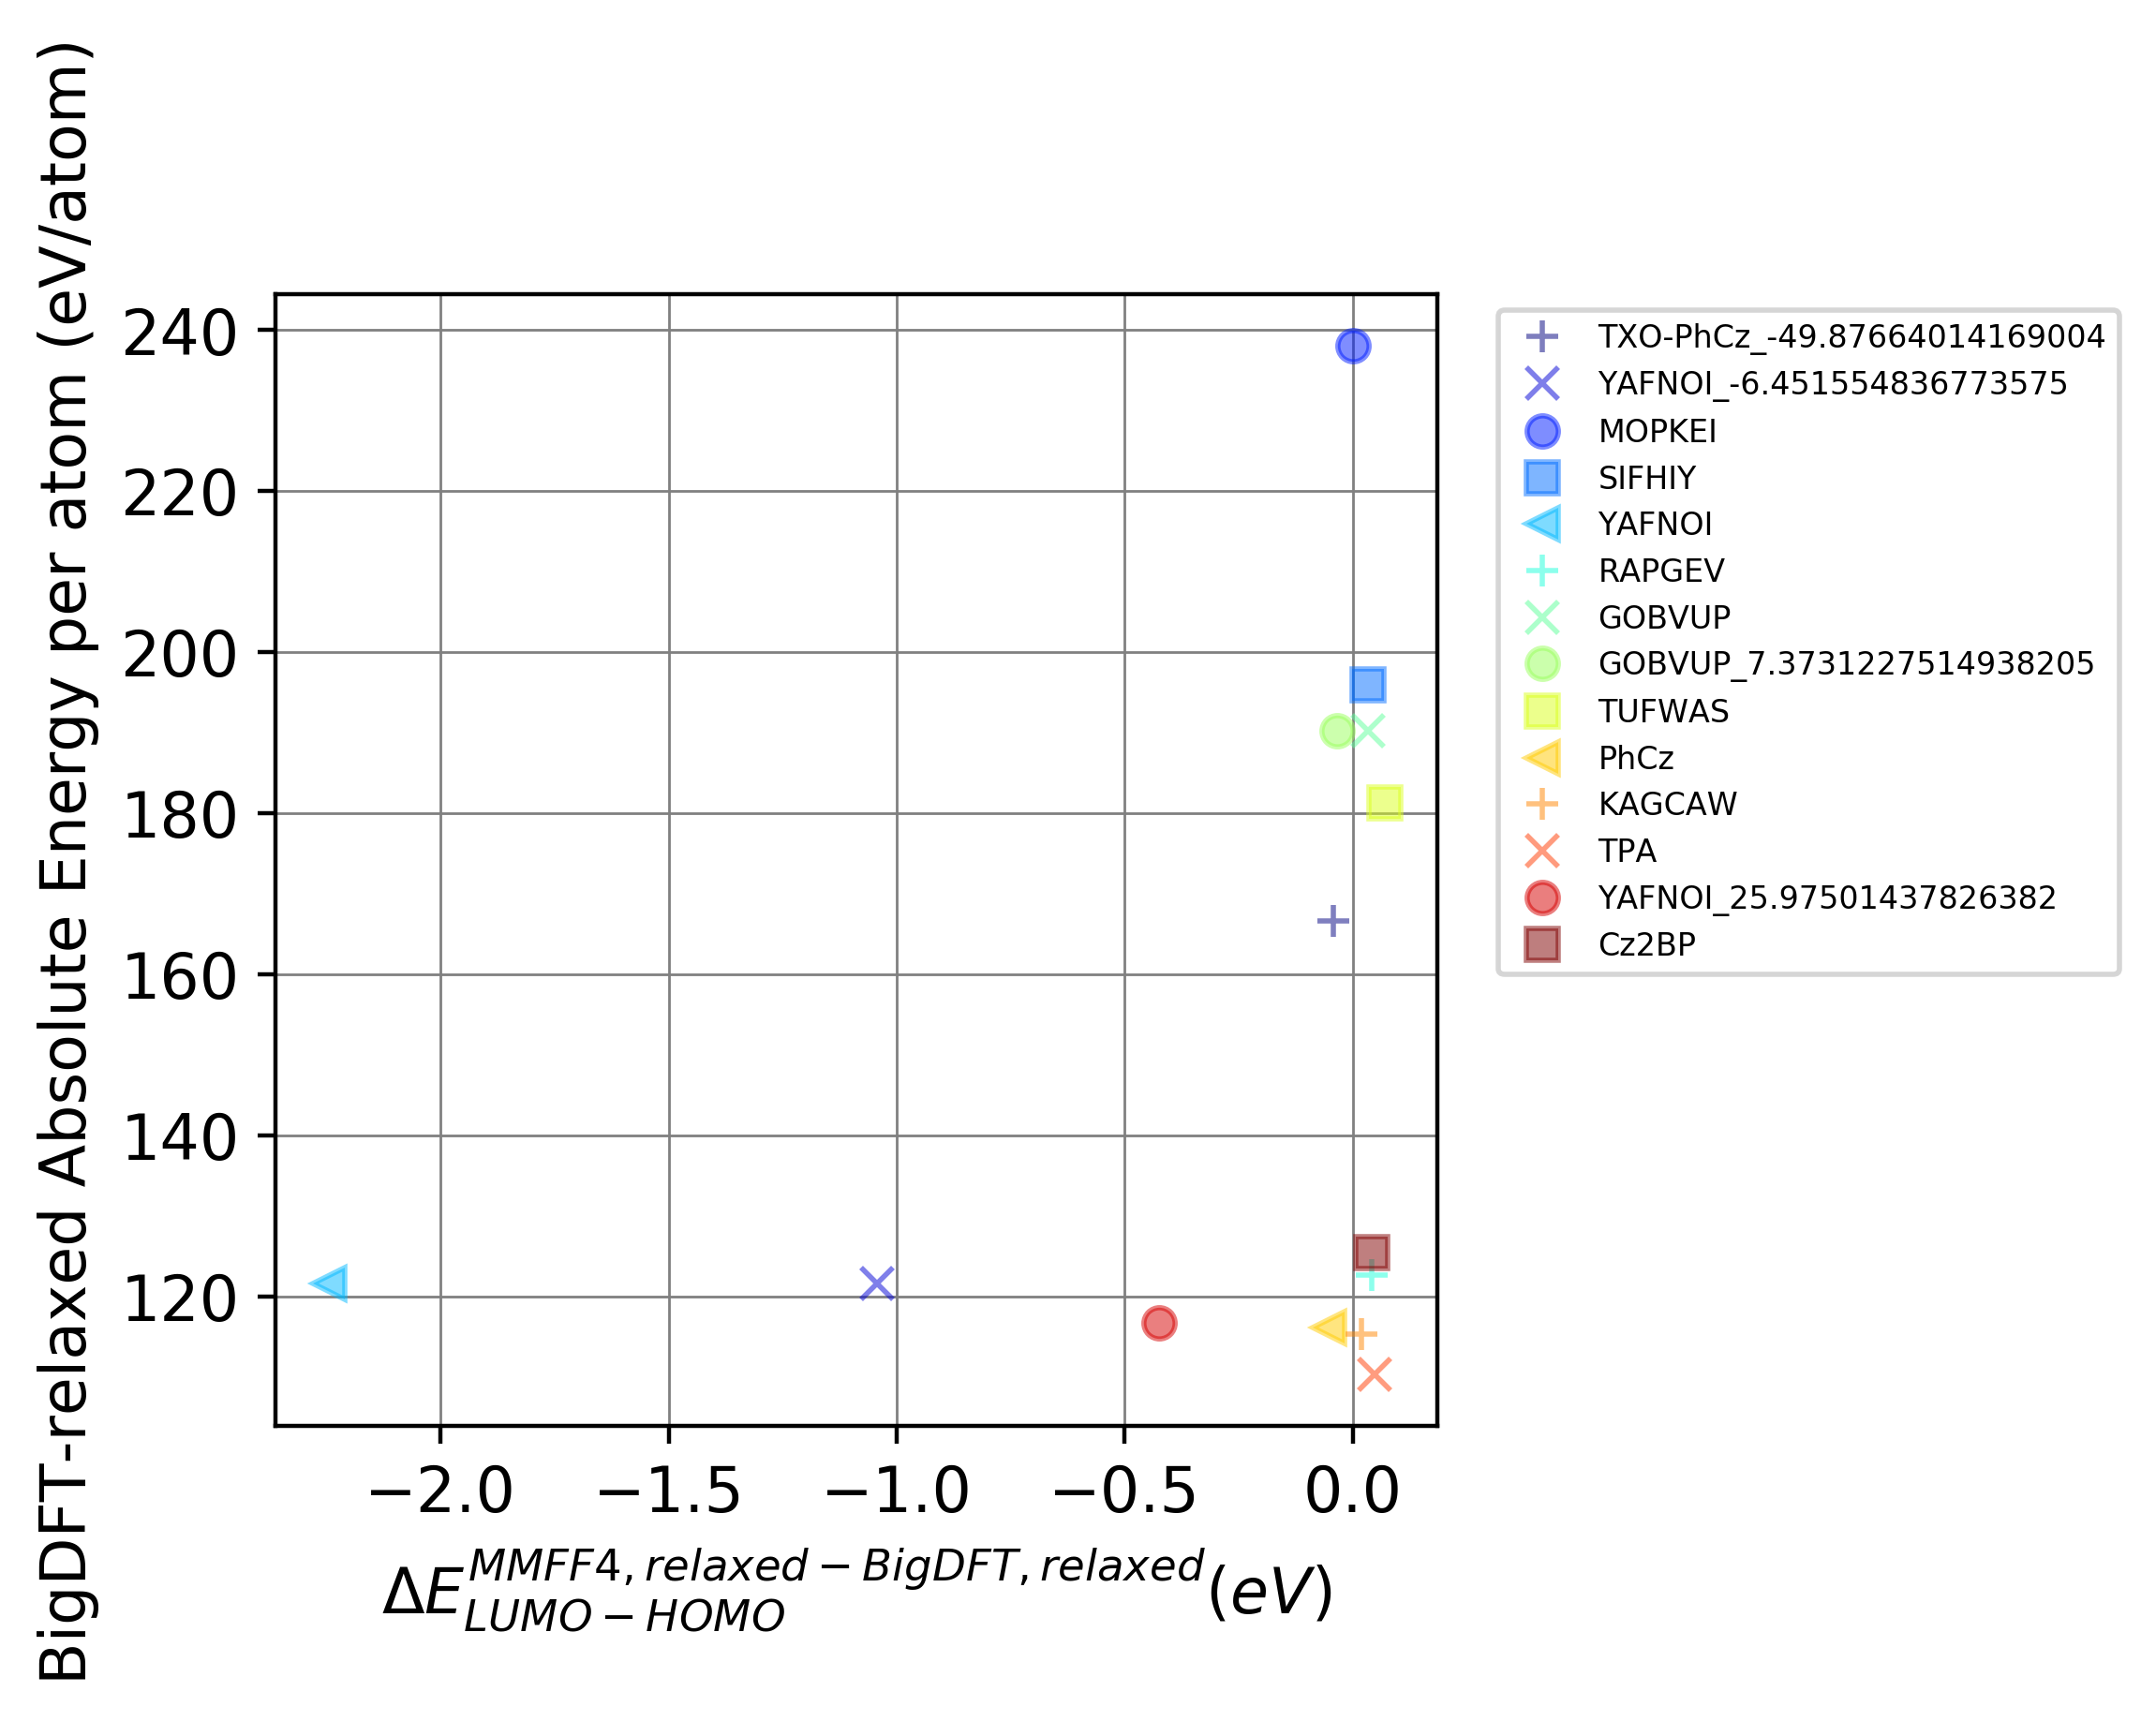

In [28]:
plt.figure(figsize=(4,4),dpi=1)

matplotlib.rcParams.update({'font.size': 12})

y_MMFF94 = []
x_BigDFT = []


for i, mol in enumerate(df_BigDFT["molecule"]):
    for j, mol2 in enumerate(df_MMFF94["molecule"]):
        if mol == mol2:
#             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
            x_BigDFT.append(df_MMFF94["LUMO-HOMO"][j]-df_BigDFT["LUMO-HOMO"][i])
            y_MMFF94.append(df_BigDFT["Energy (eV)"][i])
            
            plt.plot((df_MMFF94["LUMO-HOMO"][j]-df_BigDFT["LUMO-HOMO"][i]),abs(df_BigDFT["Energy (eV)"][i]),linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.xlabel('$\Delta E^{MMFF4, relaxed-BigDFT, relaxed}_{LUMO-HOMO}(eV)$')
# plt.ylabel('$\Delta E_{MMFF4, relaxed-BigDFT, relaxed}= E_{L-H}^{MMFF4, relaxed} - E_{L-H}^{BigDFT, relaxed} (eV)$')
plt.ylabel('BigDFT-relaxed Absolute Energy per atom (eV/atom)')

x_min = min([min(list(x_BigDFT)),min(list(y_MMFF94))])-0.05
x_max = max([max(list(x_BigDFT)),max(list(y_MMFF94))])+0.05

y_min = x_min
y_max = x_max

lims = [[x_min,y_min],[x_max,y_max]]

plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

# plt.xlim([x_min,x_max])
# plt.ylim([y_min,y_max])
          
# plt.xticks(np.arange(x_min+.2, x_max,.2))
# plt.yticks(np.arange(x_min-2, x_max, .1))
            
plt.legend(bbox_to_anchor=(1.6, 1),prop={'size': 6})
plt.show()

In [33]:
plt.figure(figsize=(4,4),dpi=1)

matplotlib.rcParams.update({'font.size': 12})

y_MMFF94 = []
x_BigDFT = []


for i, mol in enumerate(df_BigDFT["molecule"]):
    for j, mol2 in enumerate(df_MMFF94["molecule"]):
        if mol == mol2:
#             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
            x_BigDFT.append(df_MMFF94["LUMO-HOMO"][j]-df_BigDFT["LUMO-HOMO"][i])
            y_MMFF94.append(abs(df_BigDFT["Energy (eV)"][i]-df_MMFF94["Energy (eV)"][j]))
            
            plt.plot((df_MMFF94["LUMO-HOMO"][j]-df_BigDFT["LUMO-HOMO"][i]),abs(df_BigDFT["Energy (eV)"][i]-df_MMFF94["Energy (eV)"][j]),linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.xlabel('$\Delta E^{MMFF4, relaxed-BigDFT, relaxed}_{LUMO-HOMO}(eV)$')
# plt.ylabel('$\Delta E_{MMFF4, relaxed-BigDFT, relaxed}= E_{L-H}^{MMFF4, relaxed} - E_{L-H}^{BigDFT, relaxed} (eV)$')
plt.ylabel('Absolute Total Energy per atom difference (eV/atom)')

x_min = min([min(list(x_BigDFT)),min(list(y_MMFF94))])-0.05
x_max = max([max(list(x_BigDFT)),max(list(y_MMFF94))])+0.05

y_min = x_min
y_max = x_max

lims = [[x_min,y_min],[x_max,y_max]]

plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

plt.yscale('log')

# plt.xlim([x_min,x_max])
# plt.ylim([y_min,y_max])
          
# plt.xticks(np.arange(x_min+.2, x_max,.2))
# plt.yticks(np.arange(x_min-2, x_max, .1))
            
plt.legend(bbox_to_anchor=(1.6, 1),prop={'size': 6})
plt.show()

In [ ]:
tadf_mols = ['2CzPN', 'CBP', 'Cz2BP', 'PXZ-OXD', 'PXZ-TRZ', 'PhCz', 'TPA', 'TXO-PhCz', 'TXO-TPA']

In [ ]:
print key
forces